In [1]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')
#importing nltk package
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
#nltk.download('punkt')
#importing pandas
import pandas as pd
#importing package string
import string
import numpy as np
import matplotlib.pyplot as plt
#importing package for string searching and manipulation
import re
import csv
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [2]:
#Read the csv file into dataframe df
df = pd.read_csv("UsefulComments_Final.csv")
df.columns =['Id', 'PostId', 'Score', 'Text', 'CreationDate', 'UserId', 'ContentLicense', 'Tags', 'CommentCategory', 
             'ReviewedCommentCategory']
print(df.shape) # (3120, 10)

(3120, 10)


In [3]:
#List the fields in our dataframe
print(df.dtypes)

Id                           int64
PostId                       int64
Score                        int64
Text                        object
CreationDate                object
UserId                     float64
ContentLicense              object
Tags                        object
CommentCategory             object
ReviewedCommentCategory     object
dtype: object


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


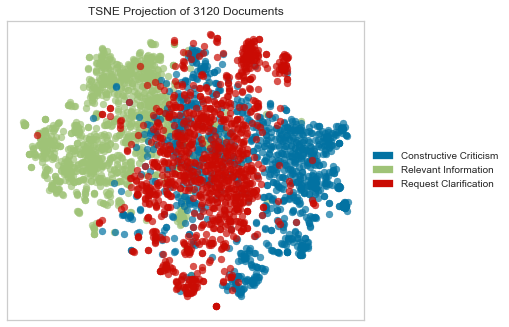

<AxesSubplot:title={'center':'TSNE Projection of 3120 Documents'}>

In [4]:
# Visualizing the high dimensional comments data using TSNE Visualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer

dataframe = pd.read_csv("UsefulComments_Final.csv")
cmt = dataframe['Text']
lbl = dataframe['ReviewedCommentCategory']

# Load the data and create document vectors
corpus = cmt
tfidf = TfidfVectorizer()

x1 = tfidf.fit_transform(corpus)
y1 = lbl

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(x1, y1)
tsne.show()

          Id    PostId  Score  \
0   78205222  45622016      4   
1   82621117  47829280      4   
2   95228543  54200824      4   
3  110651902  62570219      4   
4  111164542  60009473      4   

                                                Text     CreationDate  \
0  ngOnChanges is a lifecycle hook that fires whe...  8/10/2017 20:20   
1  For future questions: code and error messages ...  12/15/2017 9:29   
2  So you recognised the arrow function and the t...  1/15/2019 14:31   
3  `display(n->left);` but `display` doesn't expe...   6/25/2020 7:41   
4  If it is happening only in release builds, the...  7/12/2020 15:17   

      UserId ContentLicense                                          Tags  \
0  7176268.0   CC BY-SA 3.0                                     <angular>   
1  3440745.0   CC BY-SA 3.0  <c++><intellij-idea><cmake><clion><crypto++>   
2  1048572.0   CC BY-SA 4.0                    <javascript><ecmascript-6>   
3  1606345.0   CC BY-SA 4.0                           

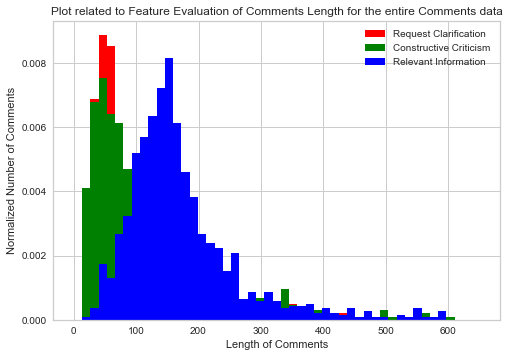

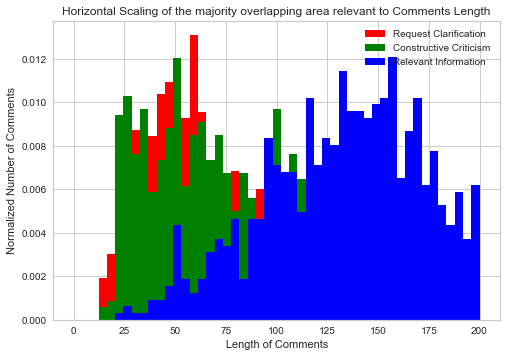

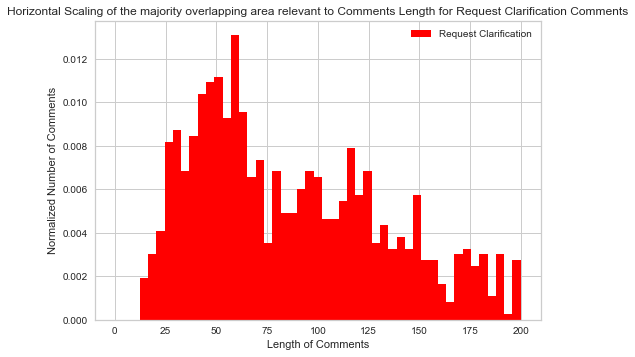

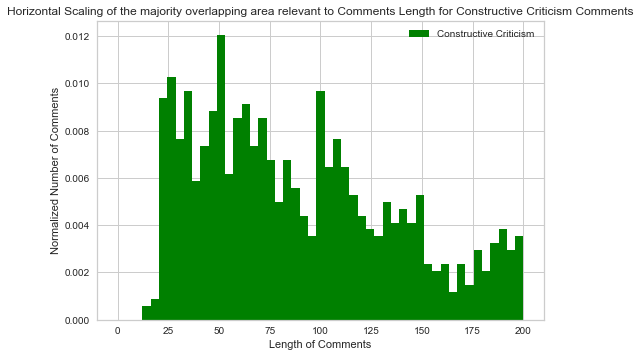

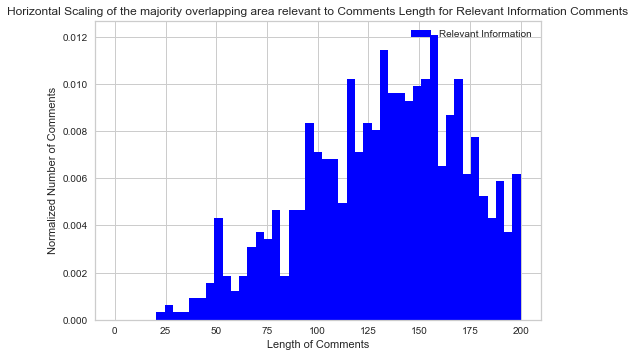

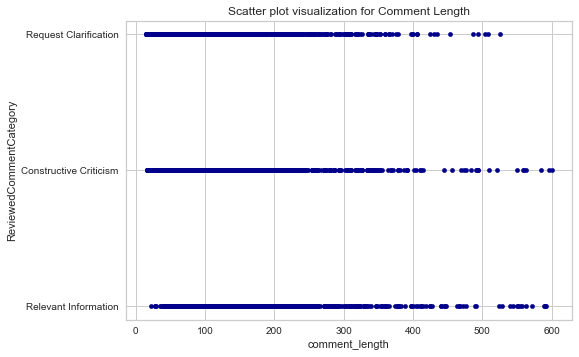

In [5]:
# Feature Engineering Trial related to Length of Comments
df['character_cnt'] = df['Text'].str.len()
df['word_counts'] = df['Text'].str.split().str.len()

# Feature Engineering for Comment Length
df['comment_length'] = df['Text'].apply(lambda x: len(x))
print(df.head())

from matplotlib import pyplot
import numpy as np

bins = np.linspace(0,650,50)
pyplot.title("Plot related to Feature Evaluation of Comments Length for the entire Comments data")
pyplot.xlabel('Length of Comments')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['comment_length'], bins, label = 
            'Request Clarification', density = True, color = 'red')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['comment_length'], bins, label = 
            'Constructive Criticism', density = True, color = 'green')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['comment_length'], bins, label = 
            'Relevant Information', density = True, color = 'blue')

pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Length/Entire_CL.png')
pyplot.show()


bins = np.linspace(0,200,50)
pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Comments Length")
pyplot.xlabel('Length of Comments')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['comment_length'], bins, label = 
            'Request Clarification', density = True, color = 'red')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['comment_length'], bins, label = 
            'Constructive Criticism', density = True, color = 'green')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['comment_length'], bins, label = 
            'Relevant Information', density = True, color = 'blue')

pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Length/Scaling_CL.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Comments Length for Request Clarification Comments")
pyplot.xlabel('Length of Comments')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['comment_length'], bins, label = 
            'Request Clarification', density = True, color = 'red')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Length/Request_Clarification_CL.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Comments Length for Constructive Criticism Comments")
pyplot.xlabel('Length of Comments')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['comment_length'], bins, label = 
            'Constructive Criticism', density = True, color = 'green')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Length/Constructive_Criticism_CL.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Comments Length for Relevant Information Comments")
pyplot.xlabel('Length of Comments')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['comment_length'], bins, label = 
            'Relevant Information', density = True, color = 'blue')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Length/Relevant_Information_CL.png')
pyplot.show()

df.plot.scatter(x='comment_length',
                      y='ReviewedCommentCategory',
                      c='DarkBlue')
pyplot.title("Scatter plot visualization for Comment Length")
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Length/Scatter_CL.png')
        

          Id    PostId  Score  \
0   78205222  45622016      4   
1   82621117  47829280      4   
2   95228543  54200824      4   
3  110651902  62570219      4   
4  111164542  60009473      4   

                                                Text     CreationDate  \
0  ngOnChanges is a lifecycle hook that fires whe...  8/10/2017 20:20   
1  For future questions: code and error messages ...  12/15/2017 9:29   
2  So you recognised the arrow function and the t...  1/15/2019 14:31   
3  `display(n->left);` but `display` doesn't expe...   6/25/2020 7:41   
4  If it is happening only in release builds, the...  7/12/2020 15:17   

      UserId ContentLicense                                          Tags  \
0  7176268.0   CC BY-SA 3.0                                     <angular>   
1  3440745.0   CC BY-SA 3.0  <c++><intellij-idea><cmake><clion><crypto++>   
2  1048572.0   CC BY-SA 4.0                    <javascript><ecmascript-6>   
3  1606345.0   CC BY-SA 4.0                           

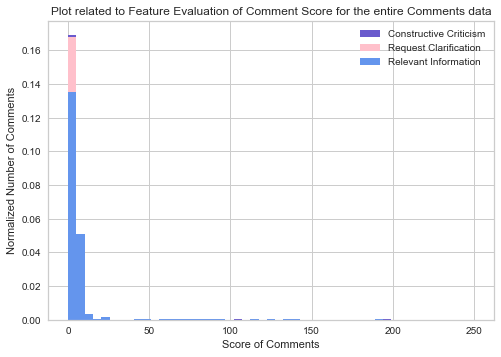

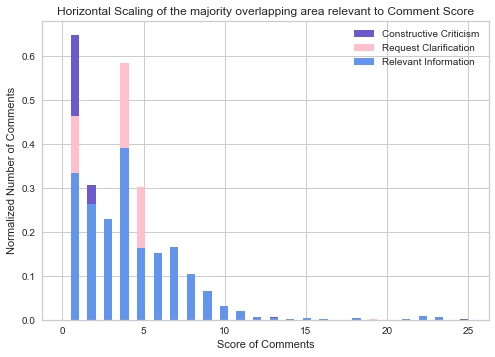

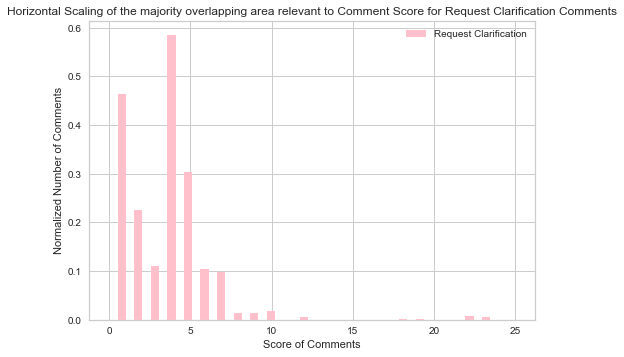

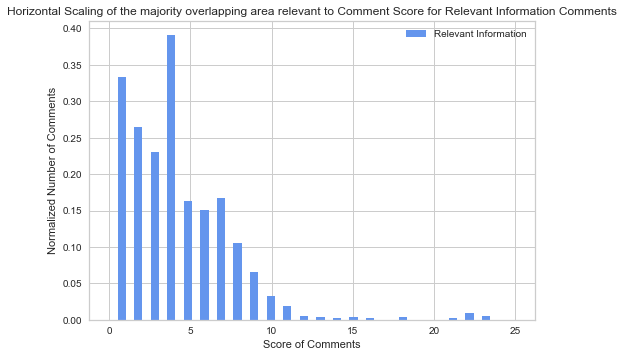

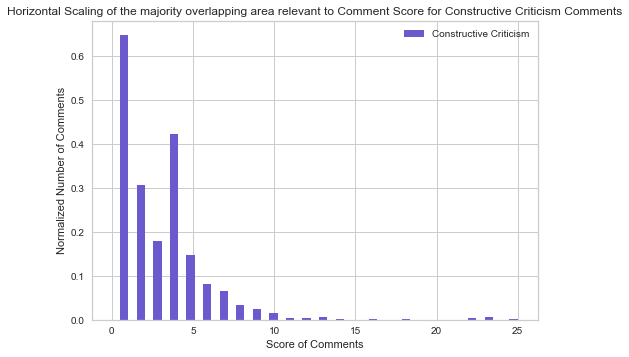

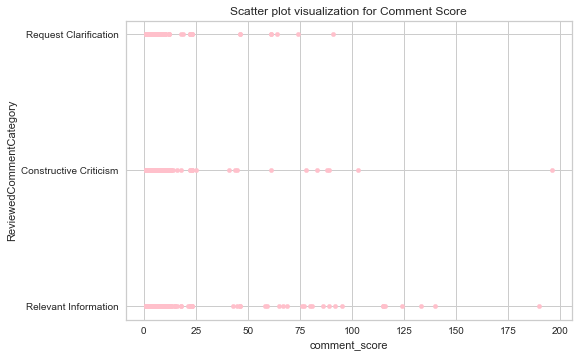

In [6]:
# Feature Engineering Trial related to Comment Score

df['comment_score'] = df['Score']
print(df.head())

bins = np.linspace(0,250,50)
pyplot.title("Plot related to Feature Evaluation of Comment Score for the entire Comments data")
pyplot.xlabel('Score of Comments')
pyplot.ylabel('Normalized Number of Comments')

pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['comment_score'], bins, label = 
            'Constructive Criticism', density = True, color = 'slateblue')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['comment_score'], bins, label = 
            'Request Clarification', density = True, color = 'pink')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['comment_score'], bins, label = 
            'Relevant Information', density = True, color = 'cornflowerblue')

pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Score/Entire_CS.png')
pyplot.show()

bins = np.linspace(0,25,50)
pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Comment Score")
pyplot.xlabel('Score of Comments')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['comment_score'], bins, label = 
            'Constructive Criticism', density = True, color = 'slateblue')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['comment_score'], bins, label = 
            'Request Clarification', density = True, color = 'pink')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['comment_score'], bins, label = 
            'Relevant Information', density = True, color = 'cornflowerblue')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Score/Scaling_CS.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Comment Score for Request Clarification Comments")
pyplot.xlabel('Score of Comments')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['comment_score'], bins, label = 
            'Request Clarification', density = True, color = 'pink')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Score/Request_Clarification_CS.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Comment Score for Relevant Information Comments")
pyplot.xlabel('Score of Comments')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['comment_score'], bins, label = 
            'Relevant Information', density = True, color = 'cornflowerblue')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Score/Relevant_Information_CS.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Comment Score for Constructive Criticism Comments")
pyplot.xlabel('Score of Comments')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['comment_score'], bins, label = 
            'Constructive Criticism', density = True, color = 'slateblue')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Score/Constructive_Criticism_CS.png')
pyplot.show()

df.plot.scatter(x='comment_score',
                      y='ReviewedCommentCategory',
                      c='Pink')
pyplot.title("Scatter plot visualization for Comment Score")
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Comment_Score/Scatter_CS.png')

ReviewedCommentCategory
Constructive Criticism     4.268530
Relevant Information      12.298556
Request Clarification      5.794501
Name: punctuation_%, dtype: float64
          Id    PostId  Score  \
0   78205222  45622016      4   
1   82621117  47829280      4   
2   95228543  54200824      4   
3  110651902  62570219      4   
4  111164542  60009473      4   

                                                Text     CreationDate  \
0  ngOnChanges is a lifecycle hook that fires whe...  8/10/2017 20:20   
1  For future questions: code and error messages ...  12/15/2017 9:29   
2  So you recognised the arrow function and the t...  1/15/2019 14:31   
3  `display(n->left);` but `display` doesn't expe...   6/25/2020 7:41   
4  If it is happening only in release builds, the...  7/12/2020 15:17   

      UserId ContentLicense                                          Tags  \
0  7176268.0   CC BY-SA 3.0                                     <angular>   
1  3440745.0   CC BY-SA 3.0  <c++><intel

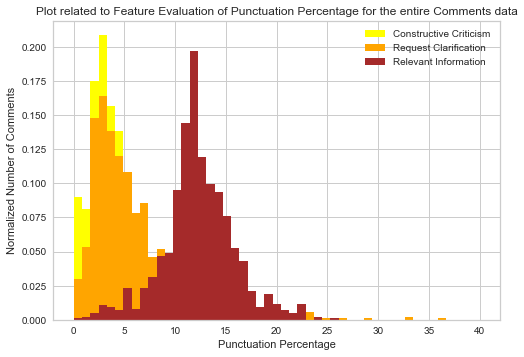

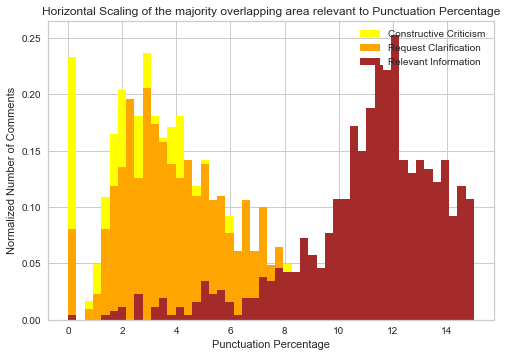

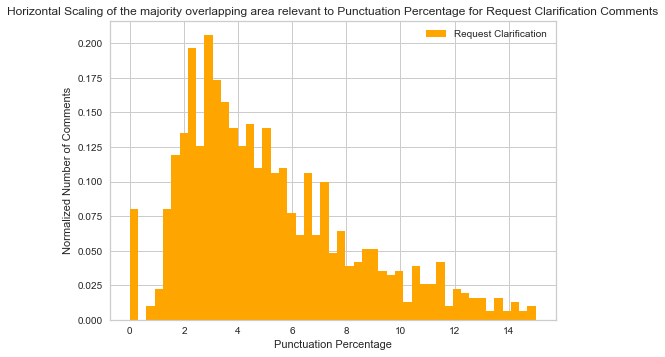

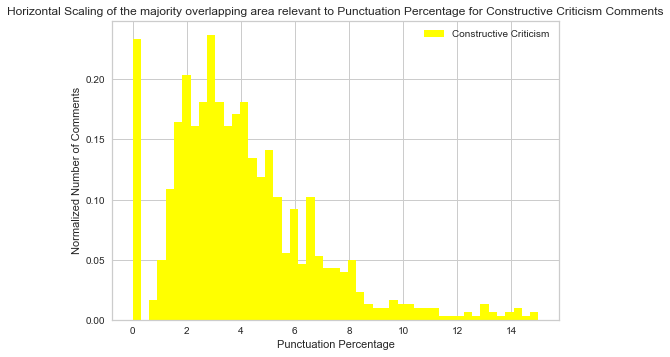

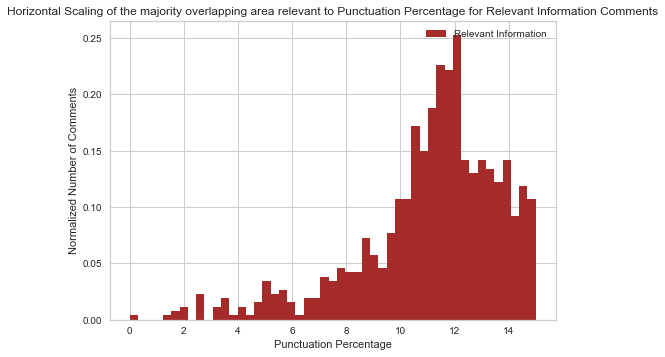

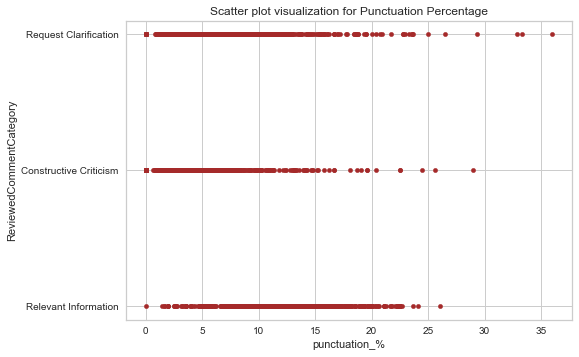

In [7]:
# Feature Engineering Trial related to Punctuation Usage

import string
def punctuation_count(text):
    count=sum([1 for c in text if c in string.punctuation])
    return 100*count/len(text)

df['punctuation_%'] = df['Text'].apply(lambda x: punctuation_count(x))
print(df.groupby('ReviewedCommentCategory')['punctuation_%'].mean())

print(df.head())

bins = np.linspace(0,40,50)
pyplot.title("Plot related to Feature Evaluation of Punctuation Percentage for the entire Comments data")
pyplot.xlabel('Punctuation Percentage')
pyplot.ylabel('Normalized Number of Comments')

pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['punctuation_%'], bins, label = 
            'Constructive Criticism', density = True, color = 'yellow')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['punctuation_%'], bins, label = 
            'Request Clarification', density = True, color = 'orange')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['punctuation_%'], bins, label = 
            'Relevant Information', density = True, color = 'brown')

pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Punctuation_Percentage/Entire_PP.png')
pyplot.show()

bins = np.linspace(0,15,50)
pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Punctuation Percentage")
pyplot.xlabel('Punctuation Percentage')
pyplot.ylabel('Normalized Number of Comments')

pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['punctuation_%'], bins, label = 
            'Constructive Criticism', density = True, color = 'yellow')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['punctuation_%'], bins, label = 
            'Request Clarification', density = True, color = 'orange')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['punctuation_%'], bins, label = 
            'Relevant Information', density = True, color = 'brown')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Punctuation_Percentage/Scaling_PP.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Punctuation Percentage for Request Clarification Comments")
pyplot.xlabel('Punctuation Percentage')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['punctuation_%'], bins, label = 
            'Request Clarification', density = True, color = 'orange')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Punctuation_Percentage/Request_Clarification_PP.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Punctuation Percentage for Constructive Criticism Comments")
pyplot.xlabel('Punctuation Percentage')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['punctuation_%'], bins, label = 
            'Constructive Criticism', density = True, color = 'yellow')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Punctuation_Percentage/Constructive_Criticism_PP.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Punctuation Percentage for Relevant Information Comments")
pyplot.xlabel('Punctuation Percentage')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['punctuation_%'], bins, label = 
            'Relevant Information', density = True, color = 'brown')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Punctuation_Percentage/Relevant_Information_PP.png')
pyplot.show()

df.plot.scatter(x='punctuation_%',
                      y='ReviewedCommentCategory',
                      c='Brown')
pyplot.title("Scatter plot visualization for Punctuation Percentage")
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Punctuation_Percentage/Scatter_PP.png')

          Id    PostId  Score  \
0   78205222  45622016      4   
1   82621117  47829280      4   
2   95228543  54200824      4   
3  110651902  62570219      4   
4  111164542  60009473      4   

                                                Text     CreationDate  \
0  ngOnChanges is a lifecycle hook that fires whe...  8/10/2017 20:20   
1  For future questions: code and error messages ...  12/15/2017 9:29   
2  So you recognised the arrow function and the t...  1/15/2019 14:31   
3  `display(n->left);` but `display` doesn't expe...   6/25/2020 7:41   
4  If it is happening only in release builds, the...  7/12/2020 15:17   

      UserId ContentLicense                                          Tags  \
0  7176268.0   CC BY-SA 3.0                                     <angular>   
1  3440745.0   CC BY-SA 3.0  <c++><intellij-idea><cmake><clion><crypto++>   
2  1048572.0   CC BY-SA 4.0                    <javascript><ecmascript-6>   
3  1606345.0   CC BY-SA 4.0                           

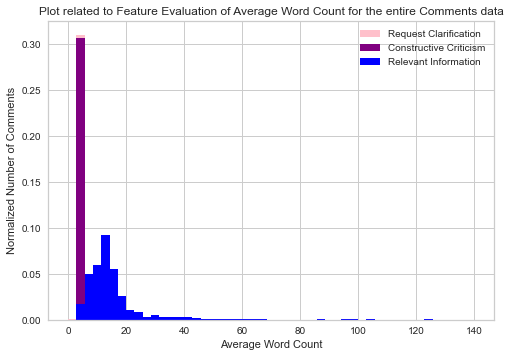

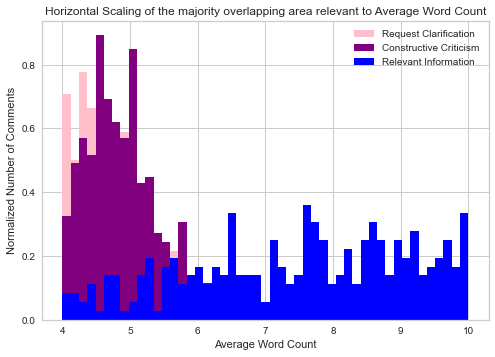

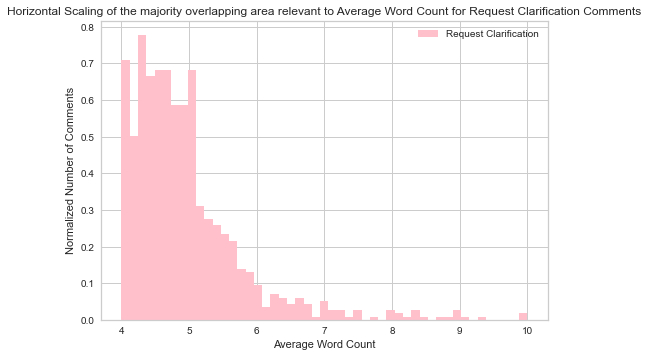

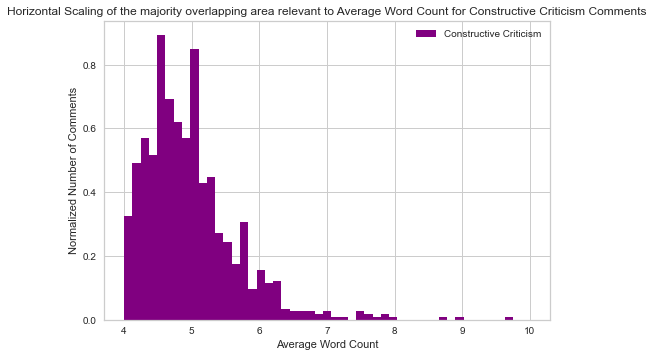

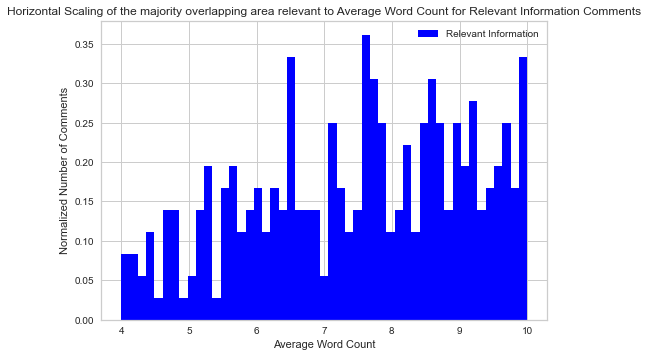

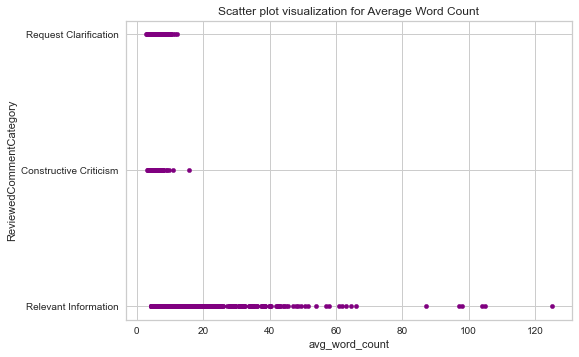

In [8]:
# Feature Engineering Trial related to Average word count

def average_word_count(text):
    words = text.split()
    average = sum(len(word) for word in words) / len(words)
    return average
    
df['avg_word_count'] = df['Text'].apply(lambda x: average_word_count(x))
print(df.head())

bins = np.linspace(0,140,50)
pyplot.title("Plot related to Feature Evaluation of Average Word Count for the entire Comments data")
pyplot.xlabel('Average Word Count')
pyplot.ylabel('Normalized Number of Comments')

pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['avg_word_count'], bins, label = 
            'Request Clarification', density = True, color = 'pink')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['avg_word_count'], bins, label = 
            'Constructive Criticism', density = True, color = 'purple')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['avg_word_count'], bins, label = 
            'Relevant Information', density = True, color = 'blue')

pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Average_Word_Count/Entire_AWC.png')
pyplot.show()

bins = np.linspace(4,10,50)
pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Average Word Count")
pyplot.xlabel('Average Word Count')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['avg_word_count'], bins, label = 
            'Request Clarification', density = True, color = 'pink')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['avg_word_count'], bins, label = 
            'Constructive Criticism', density = True, color = 'purple')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['avg_word_count'], bins, label = 
            'Relevant Information', density = True, color = 'blue')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Average_Word_Count/Scaling_AWC.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Average Word Count for Request Clarification Comments")
pyplot.xlabel('Average Word Count')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['avg_word_count'], bins, label = 
            'Request Clarification', density = True, color = 'pink')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Average_Word_Count/Request_Clarification_AWC.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Average Word Count for Constructive Criticism Comments")
pyplot.xlabel('Average Word Count')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['avg_word_count'], bins, label = 
            'Constructive Criticism', density = True, color = 'purple')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Average_Word_Count/Constructive_Criticism_AWC.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Average Word Count for Relevant Information Comments")
pyplot.xlabel('Average Word Count')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['avg_word_count'], bins, label = 
            'Relevant Information', density = True, color = 'blue')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Average_Word_Count/Relevant_Information_AWC.png')
pyplot.show()

df.plot.scatter(x='avg_word_count',
                      y='ReviewedCommentCategory',
                      c='Purple')
pyplot.title("Scatter plot visualization for Average Word Count")
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Average_Word_Count/Scatter_AWC.png')

          Id    PostId  Score  \
0   78205222  45622016      4   
1   82621117  47829280      4   
2   95228543  54200824      4   
3  110651902  62570219      4   
4  111164542  60009473      4   

                                                Text     CreationDate  \
0  ngOnChanges is a lifecycle hook that fires whe...  8/10/2017 20:20   
1  For future questions: code and error messages ...  12/15/2017 9:29   
2  So you recognised the arrow function and the t...  1/15/2019 14:31   
3  `display(n->left);` but `display` doesn't expe...   6/25/2020 7:41   
4  If it is happening only in release builds, the...  7/12/2020 15:17   

      UserId ContentLicense                                          Tags  \
0  7176268.0   CC BY-SA 3.0                                     <angular>   
1  3440745.0   CC BY-SA 3.0  <c++><intellij-idea><cmake><clion><crypto++>   
2  1048572.0   CC BY-SA 4.0                    <javascript><ecmascript-6>   
3  1606345.0   CC BY-SA 4.0                           

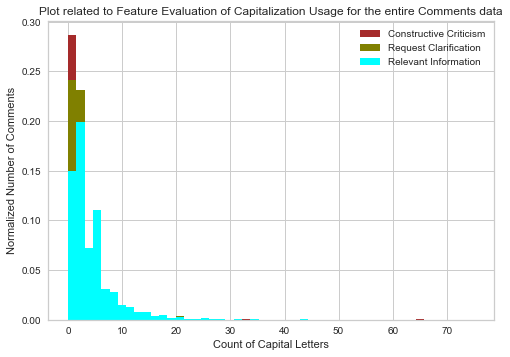

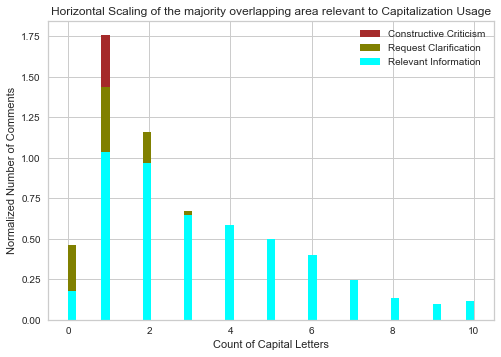

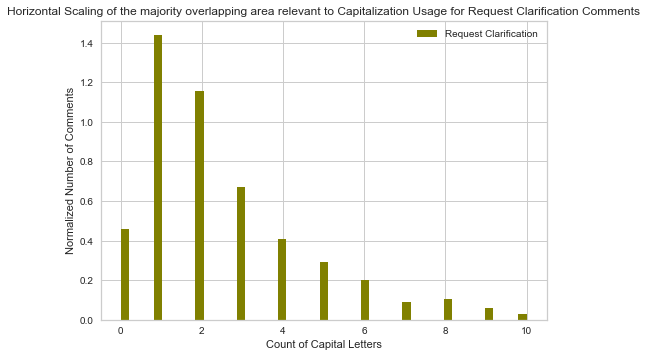

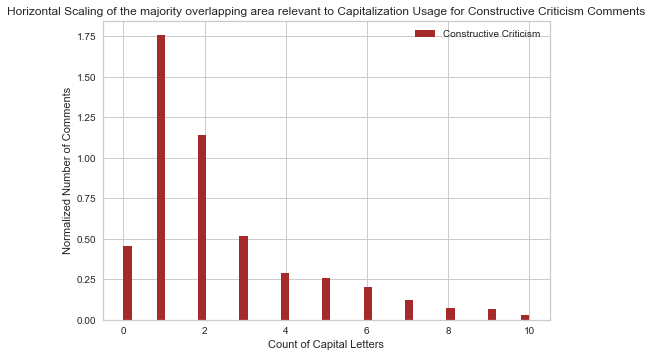

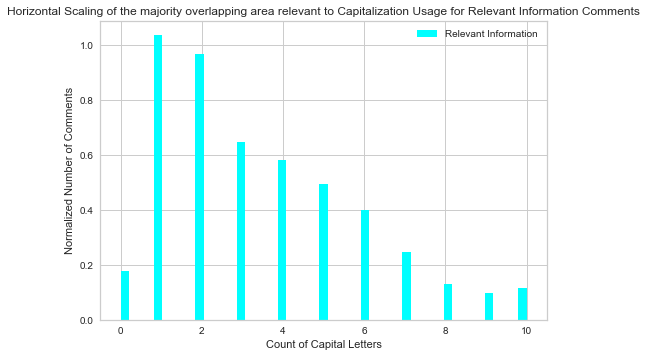

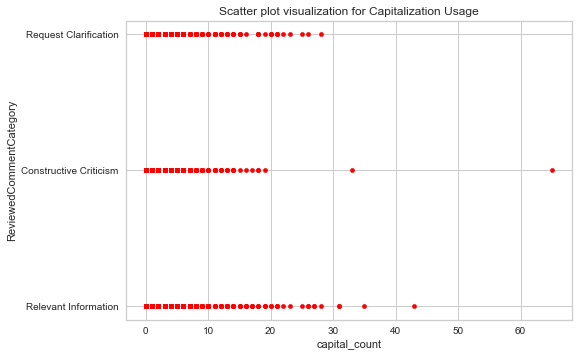

In [9]:
# Feature Engineering Trial related to Capitalization Usage in Comments

def capital_count(text):
    num_capital = sum(1 for c in text if c.isupper())
    return num_capital
    
df['capital_count'] = df['Text'].apply(lambda x: capital_count(x))
print(df.head())

bins = np.linspace(0,75,50)
pyplot.title("Plot related to Feature Evaluation of Capitalization Usage for the entire Comments data")
pyplot.xlabel('Count of Capital Letters')
pyplot.ylabel('Normalized Number of Comments')

pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['capital_count'], bins, label = 
            'Constructive Criticism', density = True, color = 'brown')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['capital_count'], bins, label = 
            'Request Clarification', density = True, color = 'olive')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['capital_count'], bins, label = 
            'Relevant Information', density = True, color = 'cyan')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Capitalization_Usage/Entire_CU.png')
pyplot.show()

bins = np.linspace(0,10,50)
pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Capitalization Usage")
pyplot.xlabel('Count of Capital Letters')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['capital_count'], bins, label = 
            'Constructive Criticism', density = True, color = 'brown')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['capital_count'], bins, label = 
            'Request Clarification', density = True, color = 'olive')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['capital_count'], bins, label = 
            'Relevant Information', density = True, color = 'cyan')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Capitalization_Usage/Scaling_CU.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Capitalization Usage for Request Clarification Comments")
pyplot.xlabel('Count of Capital Letters')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['capital_count'], bins, label = 
            'Request Clarification', density = True, color = 'olive')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Capitalization_Usage/Request_Clarification_CU.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Capitalization Usage for Constructive Criticism Comments")
pyplot.xlabel('Count of Capital Letters')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['capital_count'], bins, label = 
            'Constructive Criticism', density = True, color = 'brown')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Capitalization_Usage/Constructive_Criticism_CU.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Capitalization Usage for Relevant Information Comments")
pyplot.xlabel('Count of Capital Letters')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['capital_count'], bins, label = 
            'Relevant Information', density = True, color = 'cyan')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Capitalization_Usage/Relevant_Information_CU.png')
pyplot.show()

df.plot.scatter(x='capital_count',
                      y='ReviewedCommentCategory',
                      c='Red')
pyplot.title("Scatter plot visualization for Capitalization Usage")
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Capitalization_Usage/Scatter_CU.png')

In [10]:
from nltk.corpus import stopwords
# Updating the List of Stop Words
nltk.download('stopwords')
stopwords = stopwords.words('english')
stopwords.append('')
for x in range(ord('b'), ord('z')+1):
    stopwords.append(chr(x))    
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prasadhiranasinghe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


          Id    PostId  Score  \
0   78205222  45622016      4   
1   82621117  47829280      4   
2   95228543  54200824      4   
3  110651902  62570219      4   
4  111164542  60009473      4   

                                                Text     CreationDate  \
0  ngOnChanges is a lifecycle hook that fires whe...  8/10/2017 20:20   
1  For future questions: code and error messages ...  12/15/2017 9:29   
2  So you recognised the arrow function and the t...  1/15/2019 14:31   
3  `display(n->left);` but `display` doesn't expe...   6/25/2020 7:41   
4  If it is happening only in release builds, the...  7/12/2020 15:17   

      UserId ContentLicense                                          Tags  \
0  7176268.0   CC BY-SA 3.0                                     <angular>   
1  3440745.0   CC BY-SA 3.0  <c++><intellij-idea><cmake><clion><crypto++>   
2  1048572.0   CC BY-SA 4.0                    <javascript><ecmascript-6>   
3  1606345.0   CC BY-SA 4.0                           

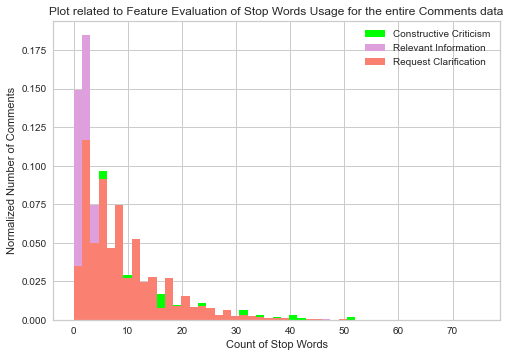

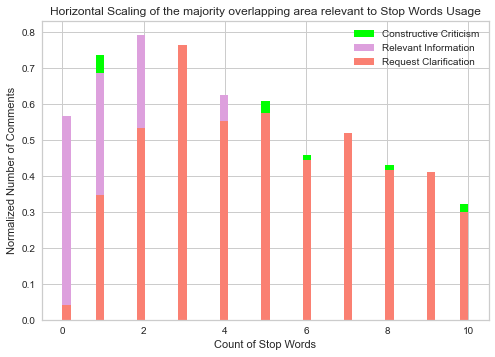

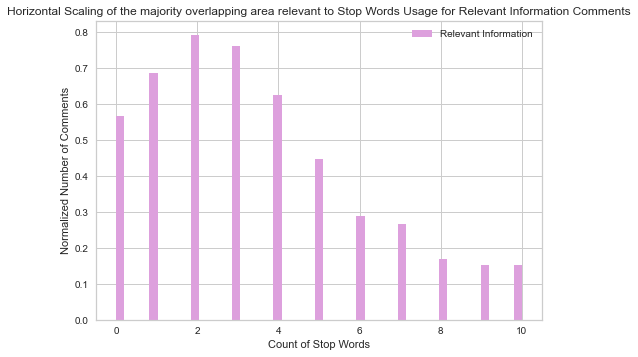

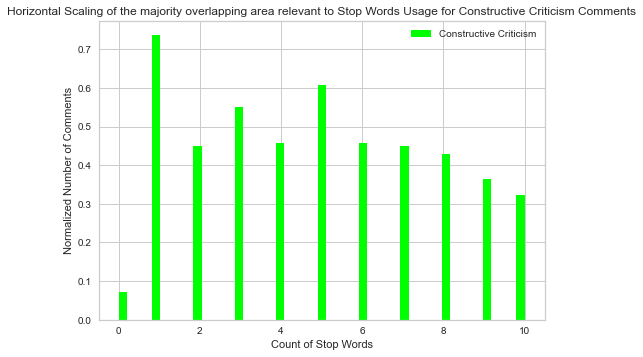

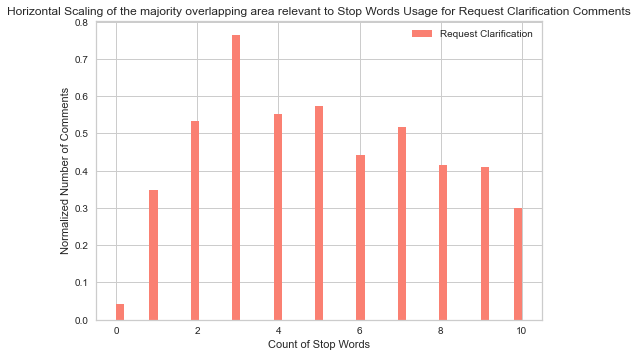

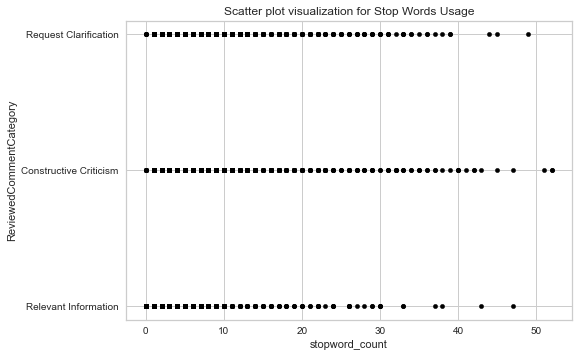

In [11]:
# Feature Engineering Trial related to Stop Words Usage in Comments

from nltk.tokenize import word_tokenize

def stopword_count(text):
    stop_word_count = 0
    word_tokens=word_tokenize(text)
    for word in word_tokens:
            if word in stopwords:
                stop_word_count += 1
    return stop_word_count
    
df['stopword_count'] = df['Text'].apply(lambda x: stopword_count(x))
print(df.head())

bins = np.linspace(0,75,50)
pyplot.title("Plot related to Feature Evaluation of Stop Words Usage for the entire Comments data")
pyplot.xlabel('Count of Stop Words')
pyplot.ylabel('Normalized Number of Comments')

pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['stopword_count'], bins, label = 
            'Constructive Criticism', density = True, color = 'lime')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['stopword_count'], bins, label = 
            'Relevant Information', density = True, color = 'plum')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['stopword_count'], bins, label = 
            'Request Clarification', density = True, color = 'salmon')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/StopWords_Usage/Entire_SWU.png')
pyplot.show()

bins = np.linspace(0,10,50)
pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Stop Words Usage")
pyplot.xlabel('Count of Stop Words')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['stopword_count'], bins, label = 
            'Constructive Criticism', density = True, color = 'lime')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['stopword_count'], bins, label = 
            'Relevant Information', density = True, color = 'plum')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['stopword_count'], bins, label = 
            'Request Clarification', density = True, color = 'salmon')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/StopWords_Usage/Scaling_SWU.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Stop Words Usage for Relevant Information Comments")
pyplot.xlabel('Count of Stop Words')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['stopword_count'], bins, label = 
            'Relevant Information', density = True, color = 'plum')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/StopWords_Usage/Relevant_Information_SWU.png')
pyplot.show()

pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Stop Words Usage for Constructive Criticism Comments")
pyplot.xlabel('Count of Stop Words')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['stopword_count'], bins, label = 
            'Constructive Criticism', density = True, color = 'lime')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/StopWords_Usage/Constructive_Criticism_SWU.png')
pyplot.show()
             
pyplot.title("Horizontal Scaling of the majority overlapping area relevant to Stop Words Usage for Request Clarification Comments")
pyplot.xlabel('Count of Stop Words')
pyplot.ylabel('Normalized Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['stopword_count'], bins, label = 
            'Request Clarification', density = True, color = 'salmon')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/StopWords_Usage/Request_Clarification_SWU.png')
pyplot.show()

df.plot.scatter(x='stopword_count',
                      y='ReviewedCommentCategory',
                      c='Black')
pyplot.title("Scatter plot visualization for Stop Words Usage")
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/StopWords_Usage/Scatter_SWU.png')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prasadhiranasinghe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


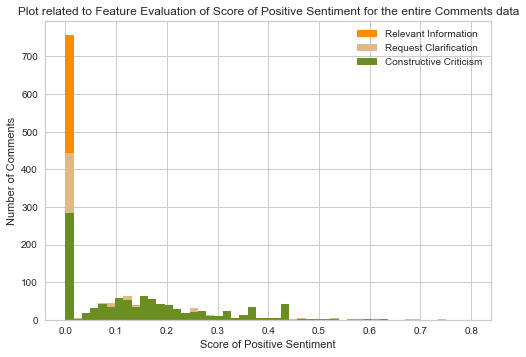

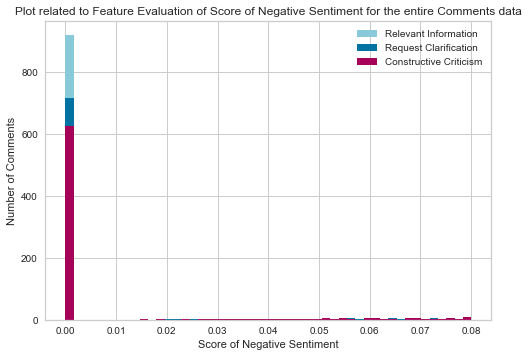

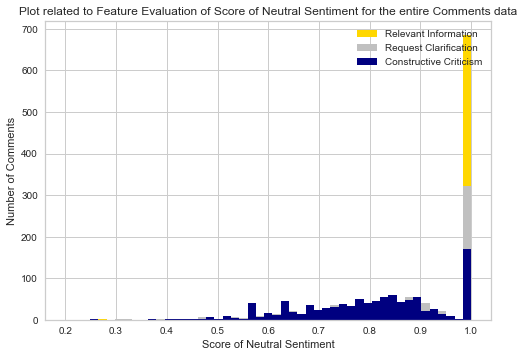

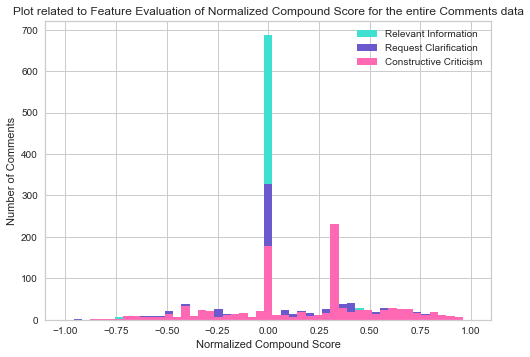

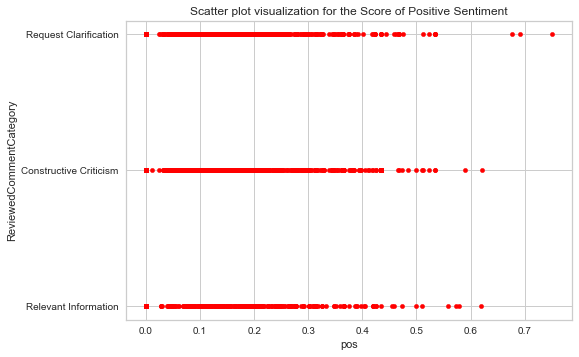

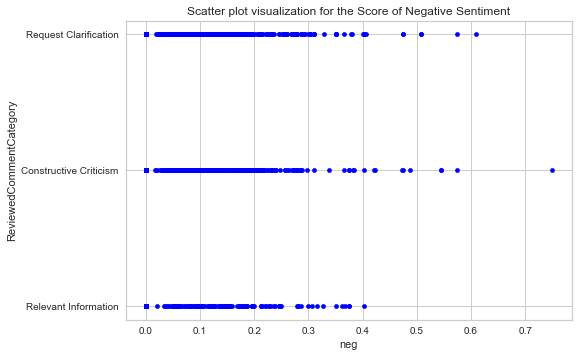

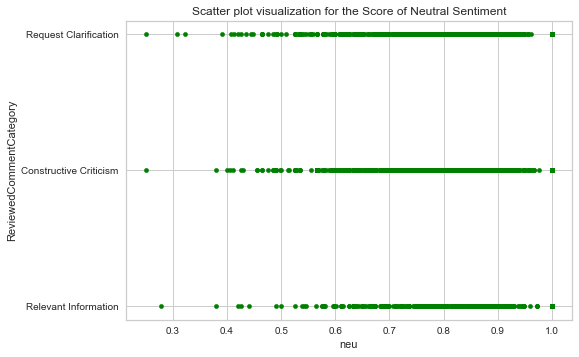

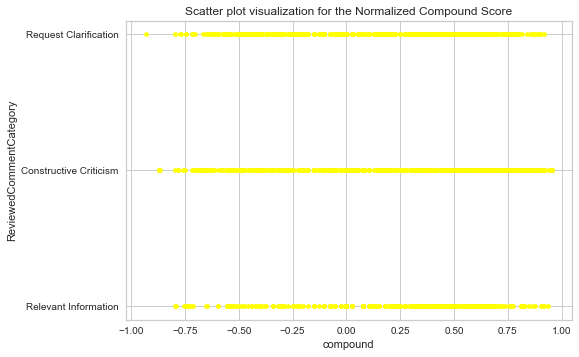

In [12]:
# Feature Engineering Trial related to Sentiment Score of Comments

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['neg'] = df['Text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df['neu'] = df['Text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df['pos'] = df['Text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df['compound'] = df['Text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

bins = np.linspace(0,0.8,50)
pyplot.title("Plot related to Feature Evaluation of Score of Positive Sentiment for the entire Comments data")
pyplot.xlabel('Score of Positive Sentiment')
pyplot.ylabel('Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['pos'], bins, label 
            = 'Relevant Information', color = 'darkorange')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['pos'], bins, label 
            = 'Request Clarification', color = 'burlywood')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['pos'], bins, label 
            = 'Constructive Criticism', color = 'olivedrab')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Sentiment_Score/Pos_Entire_SS.png')
pyplot.show()

bins = np.linspace(0,0.08,50)
pyplot.title("Plot related to Feature Evaluation of Score of Negative Sentiment for the entire Comments data")
pyplot.xlabel('Score of Negative Sentiment')
pyplot.ylabel('Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['neg'], bins, label = 
            'Relevant Information', color = 'c')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['neg'], bins, label = 
            'Request Clarification', color = 'b')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['neg'], bins, label = 
            'Constructive Criticism', color = 'm')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Sentiment_Score/Neg_Entire_SS.png')
pyplot.show()

bins = np.linspace(0.2,1,50)
pyplot.title("Plot related to Feature Evaluation of Score of Neutral Sentiment for the entire Comments data")
pyplot.xlabel('Score of Neutral Sentiment')
pyplot.ylabel('Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['neu'], bins, label = 
            'Relevant Information', color = 'gold')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['neu'], bins, label = 
            'Request Clarification', color = 'silver')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['neu'], bins, label = 
            'Constructive Criticism', color = 'navy')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Sentiment_Score/Neu_Entire_SS.png')
pyplot.show()

bins = np.linspace(-1,1,50)
pyplot.title("Plot related to Feature Evaluation of Normalized Compound Score for the entire Comments data")
pyplot.xlabel('Normalized Compound Score')
pyplot.ylabel('Number of Comments')
pyplot.hist(df[df['ReviewedCommentCategory']=='Relevant Information']['compound'], bins, label = 
            'Relevant Information', color = 'turquoise')
pyplot.hist(df[df['ReviewedCommentCategory']=='Request Clarification']['compound'], bins, label = 
            'Request Clarification', color = 'slateblue')
pyplot.hist(df[df['ReviewedCommentCategory']=='Constructive Criticism']['compound'], bins, label = 
            'Constructive Criticism', color = 'hotpink')
pyplot.legend(loc='upper right')
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Sentiment_Score/Compound_Entire_SS.png')
pyplot.show()

df.plot.scatter(x='pos',
                      y='ReviewedCommentCategory',
                      c='Red')
pyplot.title("Scatter plot visualization for the Score of Positive Sentiment")
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Sentiment_Score/Pos_Scatter_SS.png')

df.plot.scatter(x='neg',
                      y='ReviewedCommentCategory',
                      c='Blue')
pyplot.title("Scatter plot visualization for the Score of Negative Sentiment")
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Sentiment_Score/Neg_Scatter_SS.png')

df.plot.scatter(x='neu',
                      y='ReviewedCommentCategory',
                      c='Green')
pyplot.title("Scatter plot visualization for the Score of Neutral Sentiment")
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Sentiment_Score/Neu_Scatter_SS.png')

df.plot.scatter(x='compound',
                      y='ReviewedCommentCategory',
                      c='Yellow')
pyplot.title("Scatter plot visualization for the Normalized Compound Score")
pyplot.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Sentiment_Score/Compound_Scatter_SS.png')

In [14]:
#Separate the comment text data and comment category labels
comment = df['Text']
print(comment.head())
comment = comment.to_numpy()
label = df['ReviewedCommentCategory']
print(label.head())
label = label.to_numpy()

0    ngOnChanges is a lifecycle hook that fires whe...
1    For future questions: code and error messages ...
2    So you recognised the arrow function and the t...
3    `display(n->left);` but `display` doesn't expe...
4    If it is happening only in release builds, the...
Name: Text, dtype: object
0      Relevant Information
1    Constructive Criticism
2     Request Clarification
3     Request Clarification
4      Relevant Information
Name: ReviewedCommentCategory, dtype: object


In [15]:
x = [len(comment[i]) for i in range(comment.shape[0])]

In [16]:
# Calculating the Average Length of comments
print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )

average length of comment: 138.029


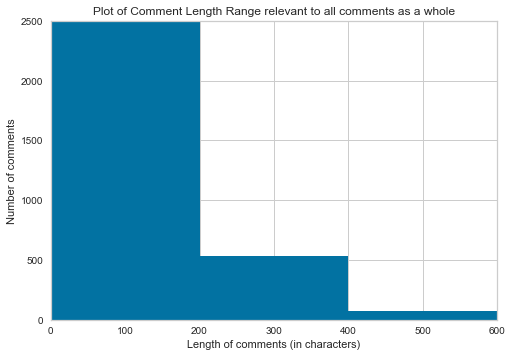

In [17]:
# Plotting a Graph related to the length of Comments
bins = [1,200,400,600,800]
plt.hist(x, bins=bins)
plt.title("Plot of Comment Length Range relevant to all comments as a whole")
plt.xlabel('Length of comments (in characters)')
plt.ylabel('Number of comments')       
plt.axis([0, 600, 0, 2500])
plt.grid(True) 
plt.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/CommentLength_Range_for_All_Categories.png')
plt.show()

In [18]:
# Whole length of comments are taken into consideration
comments = []
labels = []
for ix in range(comment.shape[0]):
        comments.append(comment[ix])
        labels.append(label[ix])       
labels = np.asarray(labels)
print(len(comments))

3120


In [19]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
#Logic related to the Removal of Punctuation                                       "
translator = str.maketrans('', '', string.punctuation)

In [21]:
#create objects for stemmer and lemmatizer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [22]:
#download words from wordnet library
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prasadhiranasinghe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
#Logic related to the Removal of emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [24]:
#List of Emoticons
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}


In [25]:
#Logic related to the Removal of emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [26]:
#Logic related to handling of chatwords in comments
def chatword_handler(text):
    text = text.split(" ")
    j = 0
    for _str in text:
        # File path which consists of Abbreviations.
        fileName = "ChatWords.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    text[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    return(' '.join(text))

In [27]:
#Logic related to replacing URLs with String
def replace_urls(text):
    url_replaced_comment = re.sub(r'https?://\S+|www\.\S+', "link", text)
    return url_replaced_comment

In [28]:
for i in range(len(comments)):
    List_Without_stopWords = []
    
    #Lowercasing comments
    comments[i] = comments[i].lower()
    
    #Replacing URL with a keyword in comments
    comments[i] = replace_urls(comments[i])
    
    #Removing Numbers from comments
    comments[i] = re.sub(r'\d+', '', comments[i])
    
    #Removing Punctuation from comments
    comments[i] = comments[i].translate(translator)
    
    #Removing emojis from comments
    comments[i] = remove_emoji(comments[i])
    
    #Removing emoticons from comments
    comments[i] = remove_emoticons(comments[i])
    
    #Replacing chat words in comments
    comments[i] = chatword_handler(comments[i])
    
    nltk_tokens = nltk.word_tokenize(comments[i])
    #print(nltk_tokens)
    
    for word in nltk_tokens:
        if word not in stopwords:
            List_Without_stopWords.append(word)

    # Applying Stemmer and Lemmatizer
    l = []
    for word in List_Without_stopWords:
        l.append(stemmer.stem(lemmatizer.lemmatize(word,pos="v")))
    comments[i] = " ".join(l)
    
    df.loc[i,'text_final'] = str(comments[i])

In [29]:
print(df['text_final'].head())

0    ngonchang lifecycl hook fire input properti ch...
1    futur question code error messag question post...
2    stack overflow recognis arrow function templat...
3    displaynleft display doesnt expect paramet mea...
4    happen releas build proguard issu check quick ...
Name: text_final, dtype: object


In [30]:
for i in range(len(labels)):
    df.loc[i, 'label'] = str(labels[i])

In [31]:
with open('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Output_ResultingDatasets/Preprocessed_Comments.csv', 'w', newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    for i in range(len(comments)):
        writer.writerow([comments[i]])

In [44]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.multiclass import OneVsOneClassifier

In [45]:
features = df[['text_final','label']]
features.head()

,text_final,label
0,ngonchang lifecycl hook fire input properti ch...,Relevant Information
1,futur question code error messag question post...,Constructive Criticism
2,stack overflow recognis arrow function templat...,Request Clarification
3,displaynleft display doesnt expect paramet mea...,Request Clarification
4,happen releas build proguard issu check quick ...,Relevant Information


In [46]:
features.label.value_counts()

Request Clarification     1063
Relevant Information      1047
Constructive Criticism    1010
Name: label, dtype: int64

In [47]:
Encoder = LabelEncoder()
df1 = features[['label']]
df1['Respective Encoding'] = Encoder.fit_transform(features['label'])
df1.value_counts()

label                   Respective Encoding
Request Clarification   2                      1063
Relevant Information    1                      1047
Constructive Criticism  0                      1010
dtype: int64

In [48]:
# Train-Test split with 80% for training set and 20% for testing set while shuffling is performed
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['text_final'], df['label'], 
                                                                    train_size=0.80, test_size=0.2, 
                                                                    shuffle=True, random_state=1001)

In [49]:
# Writing the Training and Testing data to separate files after shuffling

Test_data = pd.concat([Test_X, Test_Y], axis=1)
Train_data = pd.concat([Train_X, Train_Y], axis=1)

Test_data.to_csv('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Output_ResultingDatasets/Test_Comments.csv')
Train_data.to_csv('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Output_ResultingDatasets/Train_Comments.csv')

In [50]:
# Feature Extraction process using TFIDF and N-grams features
Train_Y = Encoder.fit_transform(Train_Y.astype(str))
Test_Y =  Encoder.fit_transform(Test_Y.astype(str))

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                                   ngram_range=(1,2), min_df=20, stop_words='english', max_features=None)
fitted_vectorizer=tfidf_vect_ngram.fit(df['text_final'].astype(str))
Train_X=fitted_vectorizer.transform(Train_X.astype(str))
Test_X = fitted_vectorizer.transform(Test_X.astype(str))

In [51]:
Train_X.shape

(2496, 275)

In [52]:
Test_X.shape

(624, 275)

In [39]:
# Writing extracted features on separate files

with open('/Users/prasadhiranasinghe/Desktop/Output_FeatureFiles_FYP/TrainX_Features.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(Train_X.toarray())
    
with open('/Users/prasadhiranasinghe/Desktop/Output_FeatureFiles_FYP/TestX_Features.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(Test_X.toarray())

In [40]:
# Prints the vocabulary that the word vectorizer has learnt from the corpus
print(tfidf_vect_ngram.vocabulary_)

{'input': 103, 'chang': 23, 'stack': 225, 'overflow': 146, 'right': 203, 'youll': 273, 'need': 137, 'good': 90, 'type': 250, 'link': 117, 'stack overflow': 226, 'question': 181, 'code': 32, 'error': 68, 'messag': 131, 'post': 168, 'text': 243, 'imag': 97, 'error messag': 69, 'function': 87, 'exactli': 71, 'unclear': 252, 'return': 202, 'valu': 259, 'doesnt': 58, 'expect': 74, 'paramet': 148, 'mean': 128, 'happen': 91, 'issu': 107, 'check': 25, 'fix': 81, 'think': 246, 'dont': 59, 'know': 112, 'data': 50, 'better': 17, 'add': 4, 'inform': 102, 'run': 204, 'tell': 241, 'compil': 39, 'refer': 190, 'file': 80, 'use': 257, 'provid': 177, 'read': 186, 'relat': 193, 'answer': 8, 'javascript': 110, 'answer question': 9, 'im': 96, 'vote': 264, 'close': 31, 'program': 174, 'pleas': 154, 'tag': 240, 'sampl': 205, 'desir': 54, 'result': 201, 'help': 93, 'sampl data': 206, 'class': 29, 'post code': 169, 'structur': 232, 'queri': 179, 'languag': 113, 'structur queri': 233, 'queri languag': 180, 'ple

In [41]:
# Print the vectorized training data
print(Train_X)

  (0, 197)	0.5501719257234367
  (0, 177)	0.43833960746230893
  (0, 163)	0.5501719257234367
  (0, 154)	0.22137217686659894
  (0, 72)	0.391758155155273
  (1, 187)	0.5893709077225057
  (1, 154)	0.2774072086640442
  (1, 123)	0.47964356814378756
  (1, 86)	0.3758597823873536
  (1, 85)	0.3505633077409018
  (1, 32)	0.28541901215468785
  (2, 194)	0.7182152565020591
  (2, 193)	0.5872813194492676
  (2, 181)	0.373185606841433
  (4, 154)	0.3223628693140159
  (4, 107)	0.7245988503320062
  (4, 4)	0.6091294497766213
  (5, 249)	0.6293470709369442
  (5, 177)	0.7771243557520823
  (6, 193)	0.8155608147342064
  (6, 117)	0.5786713726028595
  (7, 257)	0.4660886309063965
  (7, 240)	0.8170285856813461
  (7, 154)	0.3394490805987555
  (8, 231)	0.5425771190973517
  :	:
  (2494, 174)	0.27002851225140745
  (2494, 155)	0.21136506367325586
  (2494, 154)	0.12057557396273522
  (2494, 137)	0.20663650954643245
  (2494, 32)	0.12405791967758978
  (2494, 26)	0.194781511635282
  (2494, 11)	0.31560296768749135
  (2494, 8)	0.4

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import pickle

In [42]:
# Initial SVM Model Creation

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

SVM_Model = svm.SVC().fit(Train_X, Train_Y)

# save the model
filename = 'initial_svm_model.sav'
pickle.dump(SVM_Model, open(filename, 'wb'))

SVM_Model_pred = SVM_Model.predict(Test_X)

SVM_Model_accuracy = accuracy_score(Test_Y, SVM_Model_pred)
SVM_Model_f1 = f1_score(Test_Y, SVM_Model_pred, average='weighted')
print('Accuracy : ', "%.2f" % (SVM_Model_accuracy*100))
SVM_Model_f1 = f1_score(Test_Y, SVM_Model_pred, average='weighted')
print('F1 : ', "%.2f" % (SVM_Model_f1*100))
print("\n")
print('Micro Precision: {:.2f}'.format(precision_score(Test_Y, SVM_Model_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Test_Y, SVM_Model_pred, average='micro'))) 
print('Micro F1-score: {:.2f}\n'.format(f1_score(Test_Y, SVM_Model_pred, average='micro'))) 

print('Macro Precision: {:.2f}'.format(precision_score(Test_Y, SVM_Model_pred, average='macro'))) 
print('Macro Recall: {:.2f}'.format(recall_score(Test_Y, SVM_Model_pred, average='macro'))) 
print('Macro F1-score: {:.2f}\n'.format(f1_score(Test_Y, SVM_Model_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Test_Y, SVM_Model_pred, average='weighted'))) 
print('Weighted Recall: {:.2f}'.format(recall_score(Test_Y, SVM_Model_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Test_Y, SVM_Model_pred, average='weighted')))

from sklearn.metrics import confusion_matrix

confusion_SVM = confusion_matrix(Test_Y, SVM_Model_pred)
print('\nConfusion Matrix of the Initial SVM Model\n')
print(confusion_SVM)

print('\n-----Classification Report related to Initial SVM Model----\n')
classificationReport = classification_report(Test_Y, SVM_Model_pred, target_names=['Class 1', 'Class 2', 'Class 3'])
print(classificationReport)

Accuracy :  87.02
F1 :  87.21


Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.88
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.88
Weighted Recall: 0.87
Weighted F1-score: 0.87

Confusion Matrix of the Initial SVM Model

[[173   5  26]
 [  1 186  31]
 [  8  10 184]]

-----Classification Report related to Initial SVM Model----

              precision    recall  f1-score   support

     Class 1       0.95      0.85      0.90       204
     Class 2       0.93      0.85      0.89       218
     Class 3       0.76      0.91      0.83       202

    accuracy                           0.87       624
   macro avg       0.88      0.87      0.87       624
weighted avg       0.88      0.87      0.87       624



In [77]:
# Hyperparameter tuning for SVM's Linear Kernel

# defining parameter range
param_grid_linear = {'C': [0.1, 1, 2, 3, 5, 10, 100, 1000], 
                     'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scale'],
                     'decision_function_shape': ['ovo', 'ovr'],
                     'kernel': ['linear']} 
  
grid_linear = GridSearchCV(svm.SVC(), param_grid_linear, refit = True, verbose = 2, cv=3)
  
# fitting the model for grid search
grid_linear.fit(Train_X,Train_Y)

# print best parameter after tuning
print("Best parameters of Linear Kernel after tuning are: ", grid_linear.best_params_)
print("\n")  
# print how our model looks after hyper-parameter tuning
print(grid_linear.best_estimator_)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV] C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, total=   0.3s
[CV] C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear ......
[CV]  C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=linear ...
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.2s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=linear ...
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.2s
[C

[CV]  C=1, decision_function_shape=ovo, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=1, decision_function_shape=ovo, gamma=0.0001, kernel=linear ...
[CV]  C=1, decision_function_shape=ovo, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=linear .....
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.2s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=linear .....
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.2s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=linear .....
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=linear, total=   0.2s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=linear ....
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=linear, total=   0.2s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=linear ....
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=linear, total=   0.2s
[

[CV]  C=2, decision_function_shape=ovr, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=2, decision_function_shape=ovr, gamma=0.1, kernel=linear ......
[CV]  C=2, decision_function_shape=ovr, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=2, decision_function_shape=ovr, gamma=0.01, kernel=linear .....
[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=linear, total=   0.2s
[CV] C=2, decision_function_shape=ovr, gamma=0.01, kernel=linear .....
[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.01, kernel=linear .....
[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=linear, total=   0.2s
[CV] C=2, decision_function_shape=ovr, gamma=0.001, kernel=linear ....
[CV]  C=2, decision_function_shape=ovr, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.001, kernel=linear ....
[CV]  C=2, decision_function_shape=ovr, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=

[CV]  C=3, decision_function_shape=ovr, gamma=auto, kernel=linear, total=   0.2s
[CV] C=3, decision_function_shape=ovr, gamma=auto, kernel=linear .....
[CV]  C=3, decision_function_shape=ovr, gamma=auto, kernel=linear, total=   0.1s
[CV] C=3, decision_function_shape=ovr, gamma=scale, kernel=linear ....
[CV]  C=3, decision_function_shape=ovr, gamma=scale, kernel=linear, total=   0.2s
[CV] C=3, decision_function_shape=ovr, gamma=scale, kernel=linear ....
[CV]  C=3, decision_function_shape=ovr, gamma=scale, kernel=linear, total=   0.1s
[CV] C=3, decision_function_shape=ovr, gamma=scale, kernel=linear ....
[CV]  C=3, decision_function_shape=ovr, gamma=scale, kernel=linear, total=   0.2s
[CV] C=5, decision_function_shape=ovo, gamma=1, kernel=linear ........
[CV]  C=5, decision_function_shape=ovo, gamma=1, kernel=linear, total=   0.1s
[CV] C=5, decision_function_shape=ovo, gamma=1, kernel=linear ........
[CV]  C=5, decision_function_shape=ovo, gamma=1, kernel=linear, total=   0.2s
[CV] C=5, 

[CV]  C=10, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.2s
[CV] C=10, decision_function_shape=ovo, gamma=0.01, kernel=linear ....
[CV]  C=10, decision_function_shape=ovo, gamma=0.01, kernel=linear, total=   0.2s
[CV] C=10, decision_function_shape=ovo, gamma=0.001, kernel=linear ...
[CV]  C=10, decision_function_shape=ovo, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=10, decision_function_shape=ovo, gamma=0.001, kernel=linear ...
[CV]  C=10, decision_function_shape=ovo, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=10, decision_function_shape=ovo, gamma=0.001, kernel=linear ...
[CV]  C=10, decision_function_shape=ovo, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=10, decision_function_shape=ovo, gamma=0.0001, kernel=linear ..
[CV]  C=10, decision_function_shape=ovo, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=10, decision_function_shape=ovo, gamma=0.0001, kernel=linear ..
[CV]  C=10, decision_function_shape=ovo, gamma=0.0001, kernel=linear, total= 

[CV]  C=100, decision_function_shape=ovo, gamma=scale, kernel=linear, total=   0.4s
[CV] C=100, decision_function_shape=ovo, gamma=scale, kernel=linear ..
[CV]  C=100, decision_function_shape=ovo, gamma=scale, kernel=linear, total=   0.3s
[CV] C=100, decision_function_shape=ovr, gamma=1, kernel=linear ......
[CV]  C=100, decision_function_shape=ovr, gamma=1, kernel=linear, total=   0.3s
[CV] C=100, decision_function_shape=ovr, gamma=1, kernel=linear ......
[CV]  C=100, decision_function_shape=ovr, gamma=1, kernel=linear, total=   0.4s
[CV] C=100, decision_function_shape=ovr, gamma=1, kernel=linear ......
[CV]  C=100, decision_function_shape=ovr, gamma=1, kernel=linear, total=   0.3s
[CV] C=100, decision_function_shape=ovr, gamma=0.1, kernel=linear ....
[CV]  C=100, decision_function_shape=ovr, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=100, decision_function_shape=ovr, gamma=0.1, kernel=linear ....
[CV]  C=100, decision_function_shape=ovr, gamma=0.1, kernel=linear, total=   0.4s
[C

[CV]  C=1000, decision_function_shape=ovr, gamma=0.001, kernel=linear, total=   2.1s
[CV] C=1000, decision_function_shape=ovr, gamma=0.001, kernel=linear .
[CV]  C=1000, decision_function_shape=ovr, gamma=0.001, kernel=linear, total=   3.1s
[CV] C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=linear 
[CV]  C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=linear, total=   1.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=linear 
[CV]  C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=linear, total=   2.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=linear 
[CV]  C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=linear, total=   1.6s
[CV] C=1000, decision_function_shape=ovr, gamma=auto, kernel=linear ..
[CV]  C=1000, decision_function_shape=ovr, gamma=auto, kernel=linear, total=   0.7s
[CV] C=1000, decision_function_shape=ovr, gamma=auto, kernel=linear ..
[CV]  C=1000, decision_function_shape=ovr, gamma=auto, kernel=

[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:  2.0min finished


Best parameters of Linear Kernel after tuning are:  {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear'}


SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='linear')


In [43]:
# SVM Classifier with Linear Kernel with shuffling
linear = svm.SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='linear').fit(Train_X, Train_Y)

# save the model
filename = 'Linear_SVM_model.sav'
pickle.dump(linear, open(filename, 'wb'))

# Accuracy and F1-Score predictions
linear_pred = linear.predict(Test_X)
linear_accuracy = accuracy_score(Test_Y, linear_pred)
linear_f1 = f1_score(Test_Y, linear_pred, average='weighted')
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (linear_f1*100))

Accuracy (Linear Kernel):  85.58
F1 (Linear Kernel):  85.77


In [45]:
# Hyperparameter tuning for SVM's RBF Kernel

# defining parameter range
param_grid_rbf = {'C': [0.1, 1, 2, 3, 5, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scale'],
              'decision_function_shape':['ovo', 'ovr'],
              'kernel': ['rbf']} 
  
grid_rbf = GridSearchCV(svm.SVC(), param_grid_rbf, refit = True, verbose = 2, cv=3)
  
# fitting the model for grid search
grid_rbf.fit(Train_X,Train_Y)

# print best parameter after tuning
print("Best parameters of RBF Kernel after tuning are: ", grid_rbf.best_params_)
print("\n")  
# print how our model looks after hyper-parameter tuning
print(grid_rbf.best_estimator_)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV] C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf .........
[CV]  C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, total=   0.4s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, total=   0.4s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, total=   0.5s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=rbf ......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=rbf ......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=0.1, decision_fu

[CV]  C=1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf, total=   0.4s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=rbf ........
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.5s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=rbf ........
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.7s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=rbf ........
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.6s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf .......
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf .......
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf .......
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=1, decision_func

[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf ........
[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf .......
[CV]  C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.4s
[CV] C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf .......
[CV]  C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.4s
[CV] C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf .......
[CV]  C=2, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.4s
[CV] C=2, decision_function_shape=ovr, gamma=0.0001, kernel=rbf ......
[CV]  C=2, decision_function_shape=ovr, gamma=0.0001, kernel=rbf, total=   0.4s
[CV] C=2, decision_function_shape=ovr, gamma=0.0001, kernel=rbf ......
[CV]  C=2, decision_function_shape=ovr, gamma=0.0001, kernel=rbf, total=   0.5s
[CV] C=2, decision_fu

[CV]  C=3, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=   0.5s
[CV] C=5, decision_function_shape=ovo, gamma=1, kernel=rbf ...........
[CV]  C=5, decision_function_shape=ovo, gamma=1, kernel=rbf, total=   0.4s
[CV] C=5, decision_function_shape=ovo, gamma=1, kernel=rbf ...........
[CV]  C=5, decision_function_shape=ovo, gamma=1, kernel=rbf, total=   0.4s
[CV] C=5, decision_function_shape=ovo, gamma=1, kernel=rbf ...........
[CV]  C=5, decision_function_shape=ovo, gamma=1, kernel=rbf, total=   0.3s
[CV] C=5, decision_function_shape=ovo, gamma=0.1, kernel=rbf .........
[CV]  C=5, decision_function_shape=ovo, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=5, decision_function_shape=ovo, gamma=0.1, kernel=rbf .........
[CV]  C=5, decision_function_shape=ovo, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=5, decision_function_shape=ovo, gamma=0.1, kernel=rbf .........
[CV]  C=5, decision_function_shape=ovo, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=5, decision_function_shape=ovo, 

[CV]  C=10, decision_function_shape=ovo, gamma=0.0001, kernel=rbf, total=   0.4s
[CV] C=10, decision_function_shape=ovo, gamma=0.0001, kernel=rbf .....
[CV]  C=10, decision_function_shape=ovo, gamma=0.0001, kernel=rbf, total=   0.4s
[CV] C=10, decision_function_shape=ovo, gamma=0.0001, kernel=rbf .....
[CV]  C=10, decision_function_shape=ovo, gamma=0.0001, kernel=rbf, total=   0.4s
[CV] C=10, decision_function_shape=ovo, gamma=auto, kernel=rbf .......
[CV]  C=10, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=10, decision_function_shape=ovo, gamma=auto, kernel=rbf .......
[CV]  C=10, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=10, decision_function_shape=ovo, gamma=auto, kernel=rbf .......
[CV]  C=10, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=10, decision_function_shape=ovo, gamma=scale, kernel=rbf ......
[CV]  C=10, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=10, dec

[CV]  C=100, decision_function_shape=ovr, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=100, decision_function_shape=ovr, gamma=0.1, kernel=rbf .......
[CV]  C=100, decision_function_shape=ovr, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=100, decision_function_shape=ovr, gamma=0.01, kernel=rbf ......
[CV]  C=100, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=100, decision_function_shape=ovr, gamma=0.01, kernel=rbf ......
[CV]  C=100, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=100, decision_function_shape=ovr, gamma=0.01, kernel=rbf ......
[CV]  C=100, decision_function_shape=ovr, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=100, decision_function_shape=ovr, gamma=0.001, kernel=rbf .....
[CV]  C=100, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=100, decision_function_shape=ovr, gamma=0.001, kernel=rbf .....
[CV]  C=100, decision_function_shape=ovr, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=100, de

[CV]  C=1000, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=1000, decision_function_shape=ovr, gamma=auto, kernel=rbf .....
[CV]  C=1000, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=1000, decision_function_shape=ovr, gamma=scale, kernel=rbf ....
[CV]  C=1000, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=1000, decision_function_shape=ovr, gamma=scale, kernel=rbf ....
[CV]  C=1000, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=1000, decision_function_shape=ovr, gamma=scale, kernel=rbf ....
[CV]  C=1000, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=   0.3s


[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:  1.9min finished


Best parameters of RBF Kernel after tuning are:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=2, decision_function_shape='ovo')


In [44]:
# SVM Classifier with RBF Kernel with shuffling
rbf = svm.SVC(kernel='rbf', C=2, decision_function_shape='ovo', gamma='scale').fit(Train_X, Train_Y)

# save the model
filename = 'RBF_SVM_model.sav'
pickle.dump(rbf, open(filename, 'wb'))

# Accuracy and F1-Score predictions
rbf_pred = rbf.predict(Test_X)
rbf_accuracy = accuracy_score(Test_Y, rbf_pred)
rbf_f1 = f1_score(Test_Y, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  87.02
F1 (RBF Kernel):  87.11


In [47]:
# Hyperparameter tuning for SVM's Polynomial Kernel

# defining parameter range
param_grid_poly = {'C': [0.1, 1, 2, 3, 5, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scale'],
              'decision_function_shape':['ovo', 'ovr'],
              'degree': [1, 1.5, 3],
              'coef0': [0.01, 0.1, 1, 10],    
              'kernel': ['poly']} 

grid_poly = GridSearchCV(svm.SVC(), param_grid_poly, refit = True, verbose = 2, cv=3)
  
# fitting the model for grid search
grid_poly.fit(Train_X, Train_Y)

# print best parameter after tuning
print("Best parameters of Polynomial Kernel after tuning are: ", grid_poly.best_params_)
print("\n")  
# print how our model looks after hyper-parameter tuning
print(grid_poly.best_estimator_)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly, total=   0.2s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly, total=   0.2s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.6s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree

[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, 

[CV]  C=0.1, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.01, decis

[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, degr

[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, total=   0.9s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly, total=   0.5s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, 

[CV]  C=0.1, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.5s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=0.1, coef0=0.1, dec

[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=1,

[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, degree=3, g

[CV]  C=0.1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=0.1, coef0=1, decision_function_shape=ov

[CV]  C=0.1, coef0=10, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=10, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=10, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly, total=   0.4s
[CV] C=0.1, coef0=10, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly, total=   0.2s
[CV] C=0.1, coef0=10, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly, total=   0.2s
[CV] C=0.1, coef0=10, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovo, degree=1

[CV]  C=0.1, coef0=10, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=10, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=10, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly, total=   0.2s
[CV] C=0.1, coef0=10, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly, total=   0.2s
[CV] C=0.1, coef0=10, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly, total=   0.2s
[CV] C=0.1, coef0=10, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovr, degree=1, gamma=

[CV]  C=0.1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.2s
[CV] C=0.1, coef0=10, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly, total=   0.2s
[CV] C=0.1, coef0=10, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly, total=   0.2s
[CV] C=0.1, coef0=10, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly, total=   0.3s
[CV] C=0.1, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly 
[CV]  C=0.1, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.1, ke

[CV]  C=1, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=1, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=1, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=1, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=1, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=1, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovo, degree=1.5, g

[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.

[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.4s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.5s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, degree=3, g

[CV]  C=1, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=o

[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=1,

[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, degree=3, g

[CV]  C=1, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   0.6s
[CV] C=1, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=1, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly, total=   0.3s
[CV] C=1, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=1, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly, total=   0.4s
[CV] C=1, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=1, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly, total=   0.4s
[CV] C=1, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=1, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly, total=   0.2s
[CV] C=1, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=1, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=sca

[CV]  C=1, coef0=1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly, total=   0.2s
[CV] C=1, coef0=1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly 
[CV]  C=1, coef0=1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly, total=   0.2s
[CV] C=1, coef0=1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly 
[CV]  C=1, coef0=1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly, total=   0.2s
[CV] C=1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly 
[CV]  C=1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly 
[CV]  C=1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly 
[CV]  C=1, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   0.2

[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly, total=   0.3s
[CV] C=1, coef0=10, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly, total=   0.2s
[CV] C=1, coef0=10, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly, total=   0.3s
[CV] C=1, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=1, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=1, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=

[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=1, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=1, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=1, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=1, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=1, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total

[CV]  C=1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=1, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=1, coef0=10, decision_function_shape=ovr, degree=1.5

[CV]  C=2, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo

[CV]  C=2, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, 

[CV]  C=2, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=2, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=2, coef0=0.01, decision_functi

[CV]  C=2, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly, total=   0.7s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly, total=   0.5s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly, total=   0.5s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly, total=   0.2s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=sca

[CV]  C=2, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.4s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly, total=   0.5s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly, total=   0.6s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly, total=   0.4s
[CV] C=2, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=1, kernel=p

[CV]  C=2, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.2s
[CV] C=2, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly, total=   0.6s
[CV] C=2, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly, total=   0.5s
[CV] C=2, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly, total=   0.3s
[CV] C=2, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly 
[CV]  C=2, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly, 

[CV]  C=2, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.3s
[CV] C=2, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.3s
[CV] C=2, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=2, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.5s
[CV] C=2, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=2, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly, tota

[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=2, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=2, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=2, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=2, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.6s
[CV] C=2, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly, total=   0.4

[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=2, coef0=1, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=2, coef0=1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=2, coef0=1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=2, coef0=1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=2, coef0=1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly, t

[CV]  C=2, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=2, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.5s
[CV] C=2, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   0.5s
[CV] C=2, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   0.8s
[CV] C=2, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   1.1s
[CV] C=2, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovo, 

[CV]  C=2, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=2, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=2, coef0=10, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, total=   0.3s
[CV] C=2, coef0=10, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, total=   0.3s
[CV] C=2, coef0=10, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, total=   0.4s
[CV] C=2, coef0=10, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovr, degree=1, gamma=scale, kerne

[CV]  C=2, coef0=10, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly, total=   0.2s
[CV] C=2, coef0=10, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly, total=   0.2s
[CV] C=2, coef0=10, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly, total=   0.2s
[CV] C=2, coef0=10, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly, total=   0.2s
[CV] C=2, coef0=10, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly 
[CV]  C=2, coef0=10, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly, total=   0.2s
[CV] C=3, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly 
[CV]  C=3, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=1, kernel=po

[CV]  C=3, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly, total=   0.1s
[CV] C=3, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=3, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly, total=   0.1s
[CV] C=3, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly 
[CV]  C=3, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly, total=   0.3s
[CV] C=3, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly 
[CV]  C=3, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly, total=   0.3s
[CV] C=3, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly 
[CV]  C=3, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly, total=   0.3s
[CV] C=3, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly 
[CV]  C=3, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.1, ke

[CV]  C=3, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=3, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly 
[CV]  C=3, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   0.1s
[CV] C=3, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly 
[CV]  C=3, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   0.3s
[CV] C=3, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=3, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=3, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=3, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=3, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=3, coef0=0.01, decision_function_shape=ovr, degree=1.5, g

[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=3, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=3, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=3, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=3, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=3, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=

[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=3, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=3, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=3, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.6s
[CV] C=3, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly, total=   0.5s
[CV] C=3, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001,

[CV]  C=3, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=3, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=3, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=3, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=3, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=3, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=3, coef0=0.1, decision_function_sha

[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=3, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=3, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.6s
[CV] C=3, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.5s
[CV] C=3, coef0=1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly, total=   0.6s
[CV] C=3, coef0=1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly

[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly, total=   0.5s
[CV] C=3, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.5s
[CV] C=3, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.5s
[CV] C=3, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.4s
[CV] C=3, coef0=1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly, total=   0.3s
[CV] C=3, coef0=1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly, total

[CV]  C=3, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly, total=   0.3s
[CV] C=3, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.1s
[CV] C=3, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.2s
[CV] C=3, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.2s
[CV] C=3, coef0=1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly, total=   0.2s
[CV] C=3, coef0=1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=3, coef0=1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly, tot

[CV]  C=3, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.1s
[CV] C=3, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly,

[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.4s
[CV] C=3, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=3, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total

[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=3, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=3, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.0001, ker

[CV]  C=5, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=5, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=5, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   0.5s
[CV] C=5, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=0.01, decisio

[CV]  C=5, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovr, 

[CV]  C=5, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly, total=   0.5s
[CV] C=5, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=5, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly, total=   0.4s
[CV] C=5, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly, total=   0.4s
[CV] C=5, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly, total=   0.4s
[CV] C=5, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly 
[CV]  C=5, coef0=0.01, decision_function_shape=ovr, degree

[CV]  C=5, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly, total=   0.3s
[CV] C=5, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=5, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly, total=   0.3s
[CV] C=5, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=5, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly, total=   0.3s
[CV] C=5, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=5, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly, total=   0.2s
[CV] C=5, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=5, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly, total=   0.2s
[CV] C=5, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=5, coef0=0.1, decision_function_shape=ovo,

[CV]  C=5, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly, total=   0.2s
[CV] C=5, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly 
[CV]  C=5, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly, total=   0.2s
[CV] C=5, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly 
[CV]  C=5, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=5, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly 
[CV]  C=5, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=5, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly 
[CV]  C=5, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=5, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=5, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.1, ker

[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly, total=   0.1s
[CV] C=5, coef0=1, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly, total=   0.1s
[CV] C=5, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=5, co

[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly, total=   0.3

[CV]  C=5, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=5, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=5, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=5, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=5, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=5, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=1, decision_function_shape=ovr, degree=1.5, ga

[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=5, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=5, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=5, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=5, coef0=10, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly, total=   0.3s
[CV] C=5, coef0=10, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=1, gamma=auto, 

[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly, total=   0.2s
[CV] C=5, coef0=10, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.1s
[CV] C=5, coef0=10, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.2s
[CV] C=5, coef0=10, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.1s
[CV] C=5, coef0=10, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly, total=   0.2s
[CV] C=5, coef0=10, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovo, degree=3, gamma=scale, kernel=

[CV]  C=5, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly, total=   0.3s
[CV] C=5, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.1s
[CV] C=5, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.1s
[CV] C=5, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.1s
[CV] C=5, coef0=10, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly, total=   0.2s
[CV] C=5, coef0=10, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=5, coef0=10, decision_function_shape=ovr, degree=3, gamma=1, kerne

[CV]  C=10, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.1s
[CV] C=10, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=10, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovo, de

[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0

[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, degree=3, g

[CV]  C=10, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=

[CV]  C=10, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=10, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=10, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=10, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovr, degree=1

[CV]  C=10, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=10, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=10, coef0=0.1, decision_function_shape=ovr, d

[CV]  C=10, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=10, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=10, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=10, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=10, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly, total=   0.3s
[CV] C=10, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovo, de

[CV]  C=10, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=10, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, total=   0.3s
[CV] C=10, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, total=   0.3s
[CV] C=10, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, total=   0.3s
[CV] C=10, coef0=1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly, total=   0.2s
[CV] C=10, coef0=1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=

[CV]  C=10, coef0=1, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly, total=   0.2s
[CV] C=10, coef0=1, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly, total=   0.2s
[CV] C=10, coef0=1, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly, total=   0.2s
[CV] C=10, coef0=1, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly 
[CV]  C=10, coef0=1, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly, total=   0.2s
[CV] C=10, coef0=10, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly, total=   0.1s
[CV] C=10, coef0=10, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovo, degree=1, gamma=1, kernel=poly, to

[CV]  C=10, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly, total=   0.2s
[CV] C=10, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly, total=   0.2s
[CV] C=10, coef0=10, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly, total=   0.2s
[CV] C=10, coef0=10, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly, total=   0.2s
[CV] C=10, coef0=10, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly, total=   0.2s
[CV] C=10, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, 

[CV]  C=10, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   0.2s
[CV] C=10, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=10, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=10, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=10, coef0=10, decision_function_shape=ovr, degree=1.5, g

[CV]  C=100, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shap

[CV]  C=100, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.4s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.01, kernel=poly, total=   0.4s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_

[CV]  C=100, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=100, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=100, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=100, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.01, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=100, coef0=0

[CV]  C=100, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_s

[CV]  C=100, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_functio

[CV]  C=100, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.001, kernel=poly, total=   0.5s
[CV] C=100, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly, total=   0.5s
[CV] C=100, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly, total=   0.7s
[CV] C=100, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=0.0001, kernel=poly, total=   0.5s
[CV] C=100, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=100, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly, total=   0.2s
[CV] C=100, coef0=0.1, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=100, coef0=0.1

[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=100, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=100, coef0=1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=1, gamma=auto, kernel=poly, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=1, gamma=s

[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.3s
[CV] C=100, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=3, gamma=auto, kernel=poly, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly, total=   0.4s
[CV] C=100, coef0=1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly, total=   0.3s
[CV] C=100, coef0=1, decision_function_shape=ovo, degree=3, gamma=scale, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovo, degree=3, gamma=sca

[CV]  C=100, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=auto, kernel=poly, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.6s
[CV] C=100, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.4s
[CV] C=100, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovr, degree=1.5, gamma=scale, kernel=poly, total=   0.5s
[CV] C=100, coef0=1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovr, degree=3, gamma=1, kernel=poly 
[CV]  C=100, coef0=1, decision_function_shape=ovr, degree=3, gam

[CV]  C=100, coef0=10, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly, total=   0.3s
[CV] C=100, coef0=10, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovo, degree=1, gamma=scale, kernel=poly, total=   0.3s
[CV] C=100, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.3s
[CV] C=100, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.3s
[CV] C=100, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=1, kernel=poly, total=   0.3s
[CV] C=100, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovo, degree=1.5, gam

[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly, total=   0.3s
[CV] C=100, coef0=10, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly, total=   0.3s
[CV] C=100, coef0=10, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=1, gamma=1, kernel=poly, total=   0.3s
[CV] C=100, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=100, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=100, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly,

[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=100, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly, total=   0.6s
[CV] C=100, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.1, kernel=poly, total=   0.6s
[CV] C=100, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.6s
[CV] C=100, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.5s
[CV] C=100, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=100, coef0=10, decision_function_shape=ovr, degree=3, gamma=0.

[CV]  C=1000, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.4s
[CV] C=1000, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=1000, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=1000, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.01, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=1000, coe

[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.01, decisio

[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.4s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.01, kernel=poly, total=   0.4s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.01, deci

[CV]  C=1000, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.01, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=1000, coe

[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision

[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, degree=3, gamma=0.0001, kernel=poly 
[CV]  C=1000, coef0=0.1, decis

[CV]  C=1000, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=0.0001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly, total=   0.1s
[CV] C=1000, coef0=1, decision_function_shape=ovo, degree=1.5, gamma=auto, kernel=poly 
[CV]  C=1000, coef0=1, decision_

[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree=1, gamma=0.0001, kernel=poly, total=   0.2s
[CV] C=1000, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, total=   0.1s
[CV] C=1000, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, total=   0.1s
[CV] C=1000, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree=1, gamma=auto, kernel=poly, total=   0.1s
[CV] C=1000, coef0=1, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree

[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly, total=   0.2s
[CV] C=1000, coef0=1, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly, total=   0.2s
[CV] C=1000, coef0=1, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree=3, gamma=auto, kernel=poly, total=   0.2s
[CV] C=1000, coef0=1, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly, total=   0.2s
[CV] C=1000, coef0=1, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly, total=   0.2s
[CV] C=1000, coef0=1, decision_function_shape=ovr, degree=3, gamma=scale, kernel=poly 
[CV]  C=1000, coef0=1, decision_function_shape=ovr, degree=3

[CV]  C=1000, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly, total=   0.7s
[CV] C=1000, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=1000, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly, total=   2.3s
[CV] C=1000, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly 
[CV]  C=1000, coef0=10, decision_function_shape=ovo, degree=1.5, gamma=scale, kernel=poly, total=   4.6s
[CV] C=1000, coef0=10, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly 
[CV]  C=1000, coef0=10, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly, total=   0.4s
[CV] C=1000, coef0=10, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly 
[CV]  C=1000, coef0=10, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly, total=   0.3s
[CV] C=1000, coef0=10, decision_function_shape=ovo, degree=3, gamma=1, kernel=poly 
[CV]  C=1000, coef0=10, decision_function_shape=ovo, de

[CV]  C=1000, coef0=10, decision_function_shape=ovr, degree=1, gamma=scale, kernel=poly, total=   1.9s
[CV] C=1000, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly 
[CV]  C=1000, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   0.6s
[CV] C=1000, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly 
[CV]  C=1000, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   1.7s
[CV] C=1000, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly 
[CV]  C=1000, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=1, kernel=poly, total=   1.5s
[CV] C=1000, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=1000, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=1000, coef0=10, decision_function_shape=ovr, degree=1.5, gamma=0.1, kernel=poly 
[CV]  C=1000, coef0=10, decision_function_shape=ovr, degr

[Parallel(n_jobs=1)]: Done 4032 out of 4032 | elapsed: 22.2min finished


Best parameters of Polynomial Kernel after tuning are:  {'C': 1, 'coef0': 0.01, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}


SVC(C=1, coef0=0.01, decision_function_shape='ovo', degree=1, kernel='poly')


In [45]:
# SVM Classifier with Polynomial Kernel with shuffling
poly = svm.SVC(C=1, coef0=0.01, decision_function_shape='ovo', degree=1, kernel='poly', gamma='scale').fit(Train_X, 
                                                                                                           Train_Y)

# save the model
filename = 'Polynomial_SVM_model.sav'
pickle.dump(poly, open(filename, 'wb'))

# Accuracy and F1-Score predictions
poly_pred = poly.predict(Test_X)
poly_accuracy = accuracy_score(Test_Y, poly_pred)
poly_f1 = f1_score(Test_Y, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  85.74
F1 (Polynomial Kernel):  85.92


In [52]:
# Hyperparameter tuning for SVM's Sigmoid Kernel

# defining parameter range
param_grid_sigmoid = {'C': [0.1, 1, 2, 3, 5, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scale'],
              'decision_function_shape':['ovo', 'ovr'],
              'coef0': [0.01, 0.1, 1, 10],     
              'kernel': ['sigmoid']} 

grid_sigmoid = GridSearchCV(svm.SVC(), param_grid_sigmoid, refit = True, verbose = 2, cv=3)
  
# fitting the model for grid search
grid_sigmoid.fit(Train_X, Train_Y)

# print best parameter after tuning
print("Best parameters of Sigmoid Kernel after tuning are: ", grid_sigmoid.best_params_)
print("\n") 
# print how our model looks after hyper-parameter tuning
print(grid_sigmoid.best_estimator_)

Fitting 3 folds for each of 448 candidates, totalling 1344 fits
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=1, kernel=sigmoid 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=1, kernel=sigmoid 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=1, kernel=sigmoid 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.2s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.3s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.7s
[CV] C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=0.1, coef0=0.01, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=0.01, decision_f

[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=0.1, coef0=0.1, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid 
[CV]  C=0.1, coef0=0.1, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=0.1, coef0=0.1, d

[CV]  C=0.1, coef0=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=0.1, coef0=1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid 
[CV]  C=0.1, coef0=1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=1, decision_function_sha

[CV]  C=0.1, coef0=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid 
[CV]  C=0.1, coef0=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid 
[CV]  C=0.1, coef0=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=10, decision_function_shape=ovr, gamma=1, kernel=sigmoid 
[CV]  C=0.1, coef0=10, decision_function_shape=ovr, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=10, decision_function_shape=ovr, gamma=1, kernel=sigmoid 
[CV]  C=0.1, coef0=10, decision_function_shape=ovr, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=10, decision_function_shape=ovr, gamma=1, kernel=sigmoid 
[CV]  C=0.1, coef0=10, decision_function_shape=ovr, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=0.1, coef0=10, decision_function_shape=ovr, gam

[CV]  C=1, coef0=0.01, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.5s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.3s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.3s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, total=   0.9s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, total=   0.6s
[CV] C=1, coef0=0.01, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid 
[CV]  C=1, coef0=0.01, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, total=   0.6s
[CV] C=1, coef0=0.01, decision_function_shape=

[CV]  C=1, coef0=0.1, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.4s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=1, coef0=0.1, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=1, coef0=0.1, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=1, coef0=0.1, decision_funct

[CV]  C=1, coef0=1, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.4s
[CV] C=1, coef0=1, decision_function_shape=ovr, gamma=auto, kernel=sigmoid 
[CV]  C=1, coef0=1, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=1, coef0=1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid 
[CV]  C=1, coef0=1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.2s
[CV] C=1, coef0=1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid 
[CV]  C=1, coef0=1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.2s
[CV] C=1, coef0=1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid 
[CV]  C=1, coef0=1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.2s
[CV] C=1, coef0=10, decision_function_shape=ovo, gamma=1, kernel=sigmoid 
[CV]  C=1, coef0=10, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=1, coef0=10, decision_function_shape=ovo, gamma=1, kernel=sigmoid

[CV]  C=2, coef0=0.01, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=2, coef0=0.01, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=2, coef0=0.01, decision_function_shape=

[CV]  C=2, coef0=0.1, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.4s
[CV] C=2, coef0=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid 
[CV]  C=2, coef0=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.4s
[CV] C=2, coef0=0.1, decision_funct

[CV]  C=2, coef0=1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=2, coef0=1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid 
[CV]  C=2, coef0=1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.4s
[CV] C=2, coef0=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid 
[CV]  C=2, coef0=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.2s
[CV] C=2, coef0=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid 
[CV]  C=2, coef0=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.2s
[CV] C=2, coef0=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid 
[CV]  C=2, coef0=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.2s
[CV] C=2, coef0=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid 
[CV]  C=2, coef0=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid, total=   0.2s
[CV] C=2, coef0=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid 
[

[CV]  C=2, coef0=10, decision_function_shape=ovr, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=2, coef0=10, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid 
[CV]  C=2, coef0=10, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.4s
[CV] C=2, coef0=10, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid 
[CV]  C=2, coef0=10, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.4s
[CV] C=2, coef0=10, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid 
[CV]  C=2, coef0=10, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.4s
[CV] C=2, coef0=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid 
[CV]  C=2, coef0=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=2, coef0=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid 
[CV]  C=2, coef0=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=2, coef0=10, decision_function_shape=ovr, gamma=0.01, kernel=sigm

[CV]  C=3, coef0=0.01, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=3, coef0=0.01, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid 
[CV]  C=3, coef0=0.01, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.4s
[CV] C=3, coef0=0.01, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid 
[CV]  C=3, coef0=0.01, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=3, coef0=0.01, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid 
[CV]  C=3, coef0=0.01, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=3, coef0=0.01, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=3, coef0=0.01, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.5s
[CV] C=3, coef0=0.01, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=3, coef0=0.01, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.4s
[CV] C=3, coef0=0.01, decis

[CV]  C=3, coef0=0.1, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=3, coef0=0.1, decision_function_shape=ovr, gamma=auto, kernel=sigmoid 
[CV]  C=3, coef0=0.1, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=3, coef0=0.1, decision_function_shape=ovr, gamma=auto, kernel=sigmoid 
[CV]  C=3, coef0=0.1, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=3, coef0=0.1, decision_function_shape=ovr, gamma=auto, kernel=sigmoid 
[CV]  C=3, coef0=0.1, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=3, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid 
[CV]  C=3, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=3, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid 
[CV]  C=3, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=3, coef0=0.1, decision_function_shape=o

[CV]  C=3, coef0=10, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=3, coef0=10, decision_function_shape=ovo, gamma=1, kernel=sigmoid 
[CV]  C=3, coef0=10, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=3, coef0=10, decision_function_shape=ovo, gamma=1, kernel=sigmoid 
[CV]  C=3, coef0=10, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=3, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid 
[CV]  C=3, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.4s
[CV] C=3, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid 
[CV]  C=3, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.4s
[CV] C=3, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid 
[CV]  C=3, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.4s
[CV] C=3, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C

[CV]  C=5, coef0=0.01, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=5, coef0=0.01, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid 
[CV]  C=5, coef0=0.01, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid 
[CV]  C=5, coef0=0.01, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid 
[CV]  C=5, coef0=0.01, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=5, coef0=0.01, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid 
[CV]  C=5, coef0=0.01, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=5, coef0=0.01, decision_

[CV]  C=5, coef0=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=5, coef0=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid 
[CV]  C=5, coef0=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=5, coef0=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid 
[CV]  C=5, coef0=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=5, coef0=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid 
[CV]  C=5, coef0=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=5, coef0=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid 
[CV]  C=5, coef0=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=5, coef0=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid 
[CV]  C=5, coef0=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=5, coef0=0.1, decision_function_shape

[CV]  C=5, coef0=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=5, coef0=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid 
[CV]  C=5, coef0=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid 
[CV]  C=5, coef0=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid 
[CV]  C=5, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid 
[CV]  C=5, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid 
[CV]  C=5, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=5, coef0=1, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid 
[CV]  C=5, coef0=1,

[CV]  C=5, coef0=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=5, coef0=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid 
[CV]  C=5, coef0=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=5, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid 
[CV]  C=5, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=5, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid 
[CV]  C=5, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.4s
[CV] C=5, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid 
[CV]  C=5, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=5, coef0=10, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=5, coef0=10, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.4s
[CV] C=5, coef0=10, decision_function_shape=ovr, gamm

[CV]  C=10, coef0=0.01, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=10, coef0=0.01, decision_function_shape=ovr, gamma=scale, kernel=sigmoid 
[CV]  C=10, coef0=0.01, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=10, coef0=0.01,

[CV]  C=10, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=10, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid 
[CV]  C=10, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=10, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid 
[CV]  C=10, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=10, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid 
[CV]  C=10, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=10, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid 
[CV]  C=10, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=10, coef0=1, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid 
[CV]  C=10, coef0=1, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=10, coef0=1, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid

[CV]  C=10, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.4s
[CV] C=10, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=10, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=10, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=10, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=10, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=10, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=10, coef0=10, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid 
[CV]  C=10, coef0=10, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.4s
[CV] C=10, coef0=10, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid 
[CV]  C=10, coef0=10, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.4s
[CV] C=10, coef0=10, decision_function_shape=ovo,

[CV]  C=100, coef0=0.01, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, total=   0.2s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, total=   0.3s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, gamma=auto, kernel=sigmoid 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=100, coef0=0.01, decision_function_shape=ovo, gamma=auto, kernel=sigmoid 
[CV]  C=100, coef0=0.01, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C

[CV]  C=100, coef0=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=100, coef0=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid 
[CV]  C=100, coef0=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=100, coef0=0.1, decision_function_shape=ovr, gamma=1, kernel=sigmoid 
[CV]  C=100, coef0=0.1, decision_function_shape=ovr, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=100, coef0=0.1, decisio

[CV]  C=100, coef0=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=100, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid 
[CV]  C=100, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid 
[CV]  C=100, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid 
[CV]  C=100, coef0=1, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid 
[CV]  C=100, coef0=1, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid 
[CV]  C=100, coef0=1, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, total=   0.2s
[CV] C=100, coef0=1, decision_function_shape=ovr, gamma=0.01,

[CV]  C=100, coef0=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=100, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid 
[CV]  C=100, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.4s
[CV] C=100, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid 
[CV]  C=100, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.4s
[CV] C=100, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid 
[CV]  C=100, coef0=10, decision_function_shape=ovr, gamma=0.001, kernel=sigmoid, total=   0.4s
[CV] C=100, coef0=10, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=100, coef0=10, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.4s
[CV] C=100, coef0=10, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=100, coef0=10, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.4s
[CV] C=100, coef0=10, decis

[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.2s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, total=   0.2s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.1s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=1000, coef0=0.01, decision_function_shape=ovr, gamma=scale, kernel=sigmoid 
[CV]  C=1000, coef0=0.01, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.1s


[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=1000, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid 
[CV]  C=1000, coef0=0.1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=1000, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid 
[CV]  C=1000, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=1000, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid 
[CV]  C=1000, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=1000, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid 
[CV]  C=1000, coef0=1, decision_function_shape=ovo, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=1000, coef0=1, decision_function_shap

[CV]  C=1000, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.4s
[CV] C=1000, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid 
[CV]  C=1000, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.4s
[CV] C=1000, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid 
[CV]  C=1000, coef0=10, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, total=   0.4s
[CV] C=1000, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=1000, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=1000, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=1000, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=1000, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid 
[CV]  C=1000, coef0=10, decision_function_shape=ovo, gamma=0.01, kernel=sigmoid, total=   0.4s
[CV] C=1000, coef0=10, decision_fun

[Parallel(n_jobs=1)]: Done 1344 out of 1344 | elapsed:  6.6min finished


Best parameters of Sigmoid Kernel after tuning are:  {'C': 10, 'coef0': 0.01, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'sigmoid'}


SVC(C=10, coef0=0.01, decision_function_shape='ovo', gamma=0.1,
    kernel='sigmoid')


In [46]:
# SVM Classifier with Sigmoid Kernel with shuffling
sigmoid = svm.SVC(C=10, coef0=0.01, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid').fit(Train_X, Train_Y)

# save the model
filename = 'Sigmoid_SVM_model.sav'
pickle.dump(sigmoid, open(filename, 'wb'))

# Accuracy and F1-Score predictions
sigmoid_pred = sigmoid.predict(Test_X)
sigmoid_accuracy = accuracy_score(Test_Y, sigmoid_pred)
sigmoid_f1 = f1_score(Test_Y, sigmoid_pred, average='weighted')
print('Accuracy (Sigmoid Kernel): ', "%.2f" % (sigmoid_accuracy*100))
print('F1 (Sigmoid Kernel): ', "%.2f" % (sigmoid_f1*100))

Accuracy (Sigmoid Kernel):  85.42
F1 (Sigmoid Kernel):  85.61


In [55]:
# Hyperparameter tuning for SVM's Precomputed Kernel

Train_X = Train_X.todense()
Test_X = Test_X.todense()
gram_train = np.dot(Train_X, Train_X.T)
gram_test=np.dot(Test_X, Train_X.T)

# defining parameter range
param_grid_precom = {'C': [0.1, 1, 2, 3, 5, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scale'],
              'decision_function_shape':['ovo', 'ovr'],     
              'kernel': ['precomputed']} 

grid_precom = GridSearchCV(svm.SVC(), param_grid_precom, refit = True, verbose = 2, cv=3)
  
# fitting the model for grid search
grid_precom.fit(gram_train, Train_Y)

# print best parameter after tuning
print("Best parameters of Precomputed Kernel after tuning are: ", grid_precom.best_params_)
print("\n")  
# print how our model looks after hyper-parameter tuning
print(grid_precom.best_estimator_)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV] C=0.1, decision_function_shape=ovo, gamma=1, kernel=precomputed .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, decision_function_shape=ovo, gamma=1, kernel=precomputed, total=   0.2s
[CV] C=0.1, decision_function_shape=ovo, gamma=1, kernel=precomputed .
[CV]  C=0.1, decision_function_shape=ovo, gamma=1, kernel=precomputed, total=   0.1s
[CV] C=0.1, decision_function_shape=ovo, gamma=1, kernel=precomputed .
[CV]  C=0.1, decision_function_shape=ovo, gamma=1, kernel=precomputed, total=   0.1s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=precomputed 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=precomputed, total=   0.1s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=precomputed 
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=precomputed, total=   0.1s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=precomputed 
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=precomputed, total=   0.1s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=precomputed 
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=precomputed, total=   0.1s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=precomputed 
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=precomputed, total=   0.1s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=precomputed 
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=precomputed, total=   0.1s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.001, kernel=precomputed 
[CV]  C=0.1, decision_function_shape=o

[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=precomputed, total=   0.1s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=precomputed 
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=precomputed, total=   0.1s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=precomputed 
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=precomputed, total=   0.1s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=precomputed 
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=precomputed, total=   0.1s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=precomputed 
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=precomputed, total=   0.1s
[CV] C=1, decision_function_shape=ovo, gamma=scale, kernel=precomputed 
[CV]  C=1, decision_function_shape=ovo, gamma=scale, kernel=precomputed, total=   0.1s
[CV] C=1, decision_function_shape=ovr, gamma=1, kernel=precomputed ...
[CV]  C=1, decision_function_shape=ovr, gamma=1, ker

[CV]  C=2, decision_function_shape=ovr, gamma=0.1, kernel=precomputed, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.01, kernel=precomputed 
[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=precomputed, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.01, kernel=precomputed 
[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=precomputed, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.01, kernel=precomputed 
[CV]  C=2, decision_function_shape=ovr, gamma=0.01, kernel=precomputed, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.001, kernel=precomputed 
[CV]  C=2, decision_function_shape=ovr, gamma=0.001, kernel=precomputed, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.001, kernel=precomputed 
[CV]  C=2, decision_function_shape=ovr, gamma=0.001, kernel=precomputed, total=   0.1s
[CV] C=2, decision_function_shape=ovr, gamma=0.001, kernel=precomputed 
[CV]  C=2, decision_function_shape=ovr, gamma=0.001, k

[CV]  C=3, decision_function_shape=ovr, gamma=auto, kernel=precomputed, total=   0.1s
[CV] C=3, decision_function_shape=ovr, gamma=auto, kernel=precomputed 
[CV]  C=3, decision_function_shape=ovr, gamma=auto, kernel=precomputed, total=   0.1s
[CV] C=3, decision_function_shape=ovr, gamma=auto, kernel=precomputed 
[CV]  C=3, decision_function_shape=ovr, gamma=auto, kernel=precomputed, total=   0.1s
[CV] C=3, decision_function_shape=ovr, gamma=scale, kernel=precomputed 
[CV]  C=3, decision_function_shape=ovr, gamma=scale, kernel=precomputed, total=   0.1s
[CV] C=3, decision_function_shape=ovr, gamma=scale, kernel=precomputed 
[CV]  C=3, decision_function_shape=ovr, gamma=scale, kernel=precomputed, total=   0.1s
[CV] C=3, decision_function_shape=ovr, gamma=scale, kernel=precomputed 
[CV]  C=3, decision_function_shape=ovr, gamma=scale, kernel=precomputed, total=   0.1s
[CV] C=5, decision_function_shape=ovo, gamma=1, kernel=precomputed ...
[CV]  C=5, decision_function_shape=ovo, gamma=1, ker

[CV]  C=10, decision_function_shape=ovo, gamma=0.01, kernel=precomputed, total=   0.1s
[CV] C=10, decision_function_shape=ovo, gamma=0.01, kernel=precomputed 
[CV]  C=10, decision_function_shape=ovo, gamma=0.01, kernel=precomputed, total=   0.1s
[CV] C=10, decision_function_shape=ovo, gamma=0.01, kernel=precomputed 
[CV]  C=10, decision_function_shape=ovo, gamma=0.01, kernel=precomputed, total=   0.1s
[CV] C=10, decision_function_shape=ovo, gamma=0.001, kernel=precomputed 
[CV]  C=10, decision_function_shape=ovo, gamma=0.001, kernel=precomputed, total=   0.1s
[CV] C=10, decision_function_shape=ovo, gamma=0.001, kernel=precomputed 
[CV]  C=10, decision_function_shape=ovo, gamma=0.001, kernel=precomputed, total=   0.1s
[CV] C=10, decision_function_shape=ovo, gamma=0.001, kernel=precomputed 
[CV]  C=10, decision_function_shape=ovo, gamma=0.001, kernel=precomputed, total=   0.1s
[CV] C=10, decision_function_shape=ovo, gamma=0.0001, kernel=precomputed 
[CV]  C=10, decision_function_shape=ov

[CV]  C=100, decision_function_shape=ovo, gamma=auto, kernel=precomputed, total=   0.3s
[CV] C=100, decision_function_shape=ovo, gamma=auto, kernel=precomputed 
[CV]  C=100, decision_function_shape=ovo, gamma=auto, kernel=precomputed, total=   0.4s
[CV] C=100, decision_function_shape=ovo, gamma=scale, kernel=precomputed 
[CV]  C=100, decision_function_shape=ovo, gamma=scale, kernel=precomputed, total=   0.3s
[CV] C=100, decision_function_shape=ovo, gamma=scale, kernel=precomputed 
[CV]  C=100, decision_function_shape=ovo, gamma=scale, kernel=precomputed, total=   0.3s
[CV] C=100, decision_function_shape=ovo, gamma=scale, kernel=precomputed 
[CV]  C=100, decision_function_shape=ovo, gamma=scale, kernel=precomputed, total=   0.3s
[CV] C=100, decision_function_shape=ovr, gamma=1, kernel=precomputed .
[CV]  C=100, decision_function_shape=ovr, gamma=1, kernel=precomputed, total=   0.3s
[CV] C=100, decision_function_shape=ovr, gamma=1, kernel=precomputed .
[CV]  C=100, decision_function_shap

[CV]  C=1000, decision_function_shape=ovr, gamma=0.1, kernel=precomputed, total=   1.7s
[CV] C=1000, decision_function_shape=ovr, gamma=0.1, kernel=precomputed 
[CV]  C=1000, decision_function_shape=ovr, gamma=0.1, kernel=precomputed, total=   2.1s
[CV] C=1000, decision_function_shape=ovr, gamma=0.01, kernel=precomputed 
[CV]  C=1000, decision_function_shape=ovr, gamma=0.01, kernel=precomputed, total=   0.6s
[CV] C=1000, decision_function_shape=ovr, gamma=0.01, kernel=precomputed 
[CV]  C=1000, decision_function_shape=ovr, gamma=0.01, kernel=precomputed, total=   1.8s
[CV] C=1000, decision_function_shape=ovr, gamma=0.01, kernel=precomputed 
[CV]  C=1000, decision_function_shape=ovr, gamma=0.01, kernel=precomputed, total=   2.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.001, kernel=precomputed 
[CV]  C=1000, decision_function_shape=ovr, gamma=0.001, kernel=precomputed, total=   0.6s
[CV] C=1000, decision_function_shape=ovr, gamma=0.001, kernel=precomputed 
[CV]  C=1000, decision

[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:  1.7min finished


In [47]:
# SVM Classifier with Precomputed Kernel with shuffling
precom = svm.SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='precomputed')
Train_X = Train_X.todense()
Test_X = Test_X.todense()
gram_train = np.dot(Train_X, Train_X.T)
precom.fit(gram_train, Train_Y)

# save the model
filename = 'Precomputed_SVM_model.sav'
pickle.dump(precom, open(filename, 'wb'))

# Accuracy and F1-Score predictions

gram_test=np.dot(Test_X, Train_X.T)
precom_pred = precom.predict(gram_test)
precom_accuracy = accuracy_score(Test_Y, precom_pred)
precom_f1 = f1_score(Test_Y, precom_pred, average='weighted')
print('Accuracy (Precomputed Kernel): ', "%.2f" % (precom_accuracy*100))
print('F1 (Preomputed Kernel): ', "%.2f" % (precom_f1*100))

Accuracy (Precomputed Kernel):  85.58
F1 (Preomputed Kernel):  85.77


In [48]:
# Gaining insight of instances belonging to each category in Test set
Test_Y
count_request_clarificaton=0
count_relevant_information=0
count_constructive_criticism=0
for label in Test_Y:
    if label==0:
        count_constructive_criticism+=1
    if label==1:
        count_relevant_information+=1
    if label==2:
        count_request_clarificaton+=1

print("Count of Request Clarification instances in Test set is, ", count_request_clarificaton)
print("Count of Relevant Information in Test set is, ", count_relevant_information)
print("Count of Constructive Criticism instances in Test set is, ", count_constructive_criticism)

Count of Request Clarification instances in Test set is,  202
Count of Relevant Information in Test set is,  218
Count of Constructive Criticism instances in Test set is,  204


In [49]:
# Confusion Matrix Logic for SVM's Kernels

from sklearn.metrics import confusion_matrix

confusion_linear = confusion_matrix(Test_Y, linear_pred)
print('\nConfusion Matrix of Linear Kernel of SVM\n')
print(confusion_linear)

confusion_rbf = confusion_matrix(Test_Y, rbf_pred)
print('\nConfusion Matrix of RBF Kernel of SVM\n')
print(confusion_rbf)

confusion_poly = confusion_matrix(Test_Y, poly_pred)
print('\nConfusion Matrix of Polynomial Kernel of SVM\n')
print(confusion_poly)

confusion_sigmoid = confusion_matrix(Test_Y, sigmoid_pred)
print('\nConfusion Matrix of Sigmoid Kernel of SVM\n')
print(confusion_sigmoid)

confusion_precom = confusion_matrix(Test_Y, precom_pred)
print('\nConfusion Matrix of Precomputed Kernel of SVM\n')
print(confusion_precom)


Confusion Matrix of Linear Kernel of SVM

[[175   5  24]
 [  4 174  40]
 [  8   9 185]]

Confusion Matrix of RBF Kernel of SVM

[[179   6  19]
 [  5 185  28]
 [ 13  10 179]]

Confusion Matrix of Polynomial Kernel of SVM

[[176   5  23]
 [  4 174  40]
 [  8   9 185]]

Confusion Matrix of Sigmoid Kernel of SVM

[[175   5  24]
 [  4 174  40]
 [  9   9 184]]

Confusion Matrix of Precomputed Kernel of SVM

[[175   5  24]
 [  4 174  40]
 [  8   9 185]]


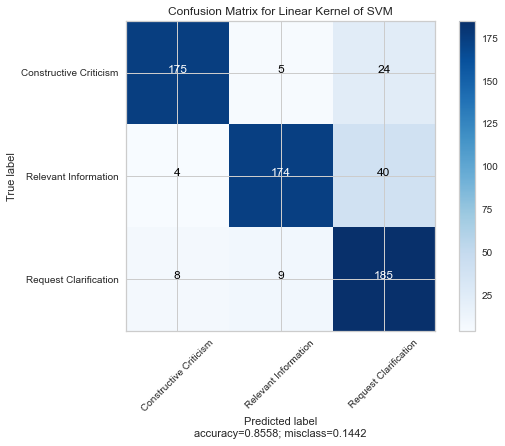

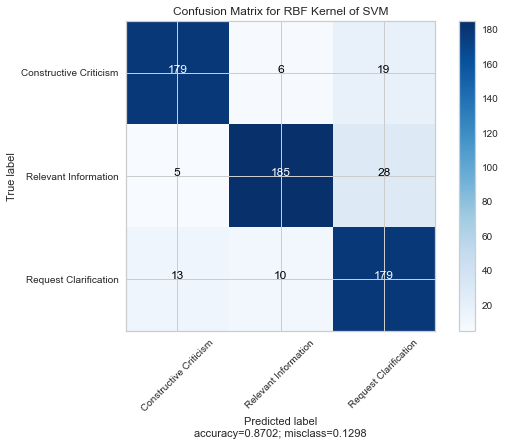

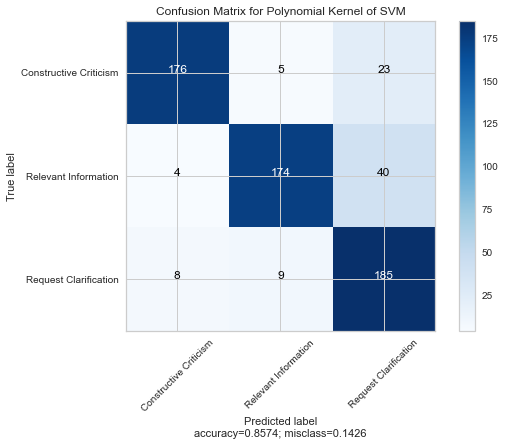

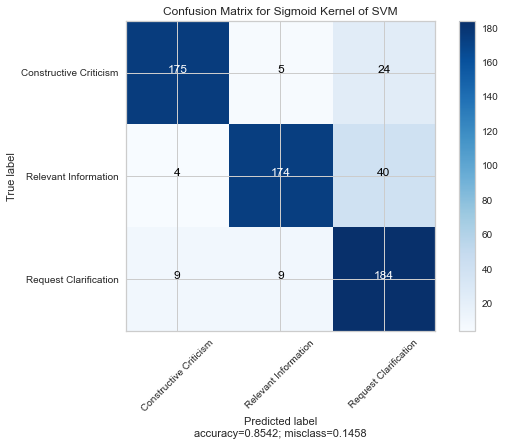

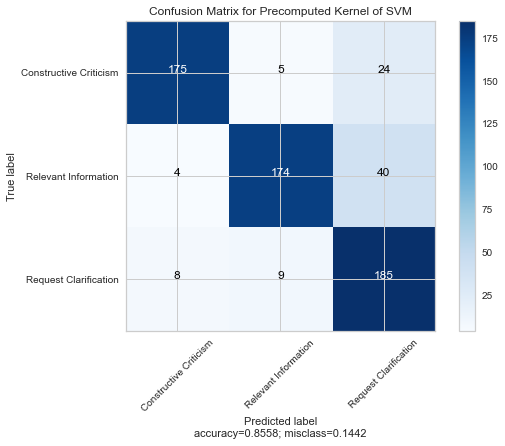

In [50]:
# Plotting of Confusion Matrix for SVM's Kernels

import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cm           = np.array(confusion_linear), 
                      normalize    = False,
                      target_names = ['Constructive Criticism', 'Relevant Information', 'Request Clarification'],
                      title        = "Confusion Matrix for Linear Kernel of SVM")

plot_confusion_matrix(cm           = np.array(confusion_rbf), 
                      normalize    = False,
                      target_names = ['Constructive Criticism', 'Relevant Information', 'Request Clarification'],
                      title        = "Confusion Matrix for RBF Kernel of SVM")

plot_confusion_matrix(cm           = np.array(confusion_poly), 
                      normalize    = False,
                      target_names = ['Constructive Criticism', 'Relevant Information', 'Request Clarification'],
                      title        = "Confusion Matrix for Polynomial Kernel of SVM")

plot_confusion_matrix(cm           = np.array(confusion_sigmoid), 
                      normalize    = False,
                      target_names = ['Constructive Criticism', 'Relevant Information', 'Request Clarification'],
                      title        = "Confusion Matrix for Sigmoid Kernel of SVM")

plot_confusion_matrix(cm           = np.array(confusion_precom), 
                      normalize    = False,
                      target_names = ['Constructive Criticism', 'Relevant Information', 'Request Clarification'],
                      title        = "Confusion Matrix for Precomputed Kernel of SVM")


In [51]:
# Classification Report related to Linear Kernel

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Test_Y, linear_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Test_Y, linear_pred, average='micro'))) 
print('Micro Recall: {:.2f}'.format(recall_score(Test_Y, linear_pred, average='micro'))) 
print('Micro F1-score: {:.2f}\n'.format(f1_score(Test_Y, linear_pred, average='micro'))) 

print('Macro Precision: {:.2f}'.format(precision_score(Test_Y, linear_pred, average='macro'))) 
print('Macro Recall: {:.2f}'.format(recall_score(Test_Y, linear_pred, average='macro'))) 
print('Macro F1-score: {:.2f}\n'.format(f1_score(Test_Y, linear_pred, average='macro'))) 

print('Weighted Precision: {:.2f}'.format(precision_score(Test_Y, linear_pred, average='weighted'))) 
print('Weighted Recall: {:.2f}'.format(recall_score(Test_Y, linear_pred, average='weighted'))) 
print('Weighted F1-score: {:.2f}'.format(f1_score(Test_Y, linear_pred, average='weighted'))) 

print('\n-----Classification Report related to Linear Kernel of SVM-----\n')
classificationReport_linear = classification_report(Test_Y, linear_pred, target_names=['Class 1', 'Class 2', 'Class 3'])
print(classificationReport_linear)


Accuracy: 0.86

Micro Precision: 0.86
Micro Recall: 0.86
Micro F1-score: 0.86

Macro Precision: 0.87
Macro Recall: 0.86
Macro F1-score: 0.86

Weighted Precision: 0.87
Weighted Recall: 0.86
Weighted F1-score: 0.86

-----Classification Report related to Linear Kernel of SVM-----

              precision    recall  f1-score   support

     Class 1       0.94      0.86      0.90       204
     Class 2       0.93      0.80      0.86       218
     Class 3       0.74      0.92      0.82       202

    accuracy                           0.86       624
   macro avg       0.87      0.86      0.86       624
weighted avg       0.87      0.86      0.86       624



In [52]:
# Classification Report related to RBF Kernel
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Test_Y, rbf_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Test_Y, rbf_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Test_Y, rbf_pred, average='micro'))) 
print('Micro F1-score: {:.2f}\n'.format(f1_score(Test_Y, rbf_pred, average='micro'))) 

print('Macro Precision: {:.2f}'.format(precision_score(Test_Y, rbf_pred, average='macro'))) 
print('Macro Recall: {:.2f}'.format(recall_score(Test_Y, rbf_pred, average='macro'))) 
print('Macro F1-score: {:.2f}\n'.format(f1_score(Test_Y, rbf_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Test_Y, rbf_pred, average='weighted'))) 
print('Weighted Recall: {:.2f}'.format(recall_score(Test_Y, rbf_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Test_Y, rbf_pred, average='weighted')))

print('\n-----Classification Report related to RBF Kernel of SVM-----\n')
classificationReport_rbf = classification_report(Test_Y, rbf_pred, target_names=['Class 1', 'Class 2', 'Class 3'])
print(classificationReport_rbf)


Accuracy: 0.87

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.87
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.87
Weighted Recall: 0.87
Weighted F1-score: 0.87

-----Classification Report related to RBF Kernel of SVM-----

              precision    recall  f1-score   support

     Class 1       0.91      0.88      0.89       204
     Class 2       0.92      0.85      0.88       218
     Class 3       0.79      0.89      0.84       202

    accuracy                           0.87       624
   macro avg       0.87      0.87      0.87       624
weighted avg       0.87      0.87      0.87       624



In [93]:
# Classification Report related to Polynomial Kernel

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Test_Y, poly_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Test_Y, poly_pred, average='micro'))) 
print('Micro Recall: {:.2f}'.format(recall_score(Test_Y, poly_pred, average='micro'))) 
print('Micro F1-score: {:.2f}\n'.format(f1_score(Test_Y, poly_pred, average='micro'))) 

print('Macro Precision: {:.2f}'.format(precision_score(Test_Y, poly_pred, average='macro'))) 
print('Macro Recall: {:.2f}'.format(recall_score(Test_Y, poly_pred, average='macro'))) 
print('Macro F1-score: {:.2f}\n'.format(f1_score(Test_Y, poly_pred, average='macro'))) 

print('Weighted Precision: {:.2f}'.format(precision_score(Test_Y, poly_pred, average='weighted'))) 
print('Weighted Recall: {:.2f}'.format(recall_score(Test_Y, poly_pred, average='weighted'))) 
print('Weighted F1-score: {:.2f}'.format(f1_score(Test_Y, poly_pred, average='weighted'))) 

from sklearn.metrics import classification_report
print('\n-----Classification Report related to Polynomial Kernel of SVM-----\n')
classificationReport_poly = classification_report(Test_Y, poly_pred, target_names=['Class 1', 'Class 2', 'Class 3'])
print(classificationReport_poly)


Accuracy: 0.86

Micro Precision: 0.86
Micro Recall: 0.86
Micro F1-score: 0.86

Macro Precision: 0.87
Macro Recall: 0.86
Macro F1-score: 0.86

Weighted Precision: 0.87
Weighted Recall: 0.86
Weighted F1-score: 0.86

-----Classification Report related to Polynomial Kernel of SVM-----

              precision    recall  f1-score   support

     Class 1       0.94      0.86      0.90       204
     Class 2       0.93      0.80      0.86       218
     Class 3       0.75      0.92      0.82       202

    accuracy                           0.86       624
   macro avg       0.87      0.86      0.86       624
weighted avg       0.87      0.86      0.86       624



In [94]:
# Classification Report related to Sigmoid Kernel
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Test_Y, sigmoid_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Test_Y, sigmoid_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Test_Y, sigmoid_pred, average='micro'))) 
print('Micro F1-score: {:.2f}\n'.format(f1_score(Test_Y, sigmoid_pred, average='micro'))) 

print('Macro Precision: {:.2f}'.format(precision_score(Test_Y, sigmoid_pred, average='macro'))) 
print('Macro Recall: {:.2f}'.format(recall_score(Test_Y, sigmoid_pred, average='macro'))) 
print('Macro F1-score: {:.2f}\n'.format(f1_score(Test_Y, sigmoid_pred, average='macro'))) 

print('Weighted Precision: {:.2f}'.format(precision_score(Test_Y, sigmoid_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Test_Y, sigmoid_pred, average='weighted'))) 
print('Weighted F1-score: {:.2f}'.format(f1_score(Test_Y, sigmoid_pred, average='weighted'))) 

print('\n-----Classification Report related to Sigmoid Kernel of SVM-----\n')
classificationReport_sigmoid = classification_report(Test_Y, sigmoid_pred, target_names=['Class 1', 'Class 2', 'Class 3'])
print(classificationReport_sigmoid)


Accuracy: 0.85

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.87
Macro Recall: 0.86
Macro F1-score: 0.86

Weighted Precision: 0.87
Weighted Recall: 0.85
Weighted F1-score: 0.86

-----Classification Report related to Sigmoid Kernel of SVM-----

              precision    recall  f1-score   support

     Class 1       0.93      0.86      0.89       204
     Class 2       0.93      0.80      0.86       218
     Class 3       0.74      0.91      0.82       202

    accuracy                           0.85       624
   macro avg       0.87      0.86      0.86       624
weighted avg       0.87      0.85      0.86       624



In [95]:
# Classification Report related to Precomputed Kernel
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Test_Y, precom_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Test_Y, precom_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Test_Y, precom_pred, average='micro'))) 
print('Micro F1-score: {:.2f}\n'.format(f1_score(Test_Y, precom_pred, average='micro'))) 

print('Macro Precision: {:.2f}'.format(precision_score(Test_Y, precom_pred, average='macro'))) 
print('Macro Recall: {:.2f}'.format(recall_score(Test_Y, precom_pred, average='macro'))) 
print('Macro F1-score: {:.2f}\n'.format(f1_score(Test_Y, precom_pred, average='macro'))) 

print('Weighted Precision: {:.2f}'.format(precision_score(Test_Y, precom_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Test_Y, precom_pred, average='weighted'))) 
print('Weighted F1-score: {:.2f}'.format(f1_score(Test_Y, precom_pred, average='weighted'))) 

print('\n-----Classification Report related to Precomputed Kernel of SVM-----\n')
classificationReport_precom = classification_report(Test_Y, precom_pred, target_names=['Class 1', 'Class 2', 'Class 3'])
print(classificationReport_precom)


Accuracy: 0.86

Micro Precision: 0.86
Micro Recall: 0.86
Micro F1-score: 0.86

Macro Precision: 0.87
Macro Recall: 0.86
Macro F1-score: 0.86

Weighted Precision: 0.87
Weighted Recall: 0.86
Weighted F1-score: 0.86

-----Classification Report related to Precomputed Kernel of SVM-----

              precision    recall  f1-score   support

     Class 1       0.94      0.86      0.90       204
     Class 2       0.93      0.80      0.86       218
     Class 3       0.74      0.92      0.82       202

    accuracy                           0.86       624
   macro avg       0.87      0.86      0.86       624
weighted avg       0.87      0.86      0.86       624



In [96]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import itertools

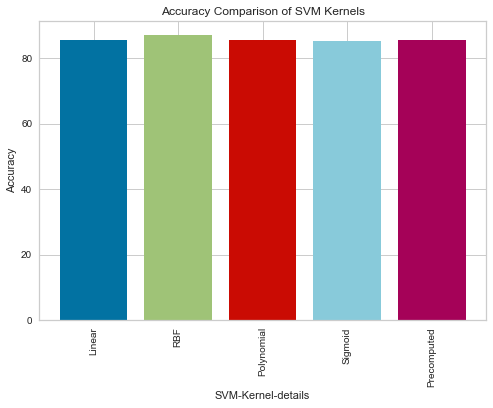

In [97]:
# Accuracy Comparison of SVM Kernels by Visualization

x = ['Linear','RBF','Polynomial','Sigmoid','Precomputed']
y = [85.58,87.02,85.74,85.42,85.58]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm'])
plt.title("Accuracy Comparison of SVM Kernels")
plt.ylabel('Accuracy')
plt.xlabel('SVM-Kernel-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.savefig('/Users/prasadhiranasinghe/Desktop/Project_Implementation/Plots/Accuracy_Comparison.png')
plt.show()

In [98]:
def preprocess_test_comments(text):
    Text_Without_stopWords = []
    text = text.lower()
    text = replace_urls(text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(translator)
    text = remove_emoji(text)
    text = remove_emoticons(text)
    text = chatword_handler(text)
    text_tokens = nltk.word_tokenize(text)

    for word in text_tokens:
        if word not in stopwords:
            Text_Without_stopWords.append(word)
    
    l1 = []
    for word in Text_Without_stopWords:
        l1.append(stemmer.stem(lemmatizer.lemmatize(word,pos="v")))
    text = " ".join(l1)
    
    return text
       
def predict_Comment_Category(text):
    p_text = preprocess_test_comments(text)
    sparse_text = fitted_vectorizer.transform([text])
    Encoded_Label = rbf.predict(sparse_text)
    Categorical_Label = Encoder.inverse_transform(Encoded_Label)
    print(Categorical_Label)
 

In [99]:
predict_Comment_Category("Can you provide your method of loading scene?")

['Request Clarification']


In [100]:
df[df['Text'] == "Can you provide your method of loading scene?"]

,Id,PostId,Score,Text,CreationDate,UserId,ContentLicense,Tags,CommentCategory,ReviewedCommentCategory,...,punctuation_%,avg_word_count,capital_count,stopword_count,neg,neu,pos,compound,text_final,label
50,93654512,53389533,3,Can you provide your method of loading scene?,11/20/2018 9:09,6396354.0,CC BY-SA 4.0,<unity3d>,Request Clarification,Request Clarification,...,2.222222,4.75,1,3,0.0,1.0,0.0,0.0,provid method load scene,Request Clarification


In [101]:
predict_Comment_Category("Does this answer your question? [Apache Spark: What is the equivalent implementation of RDD.groupByKey() using RDD.aggregateByKey()?](https://stackoverflow.com/questions/31081563/apache-spark-what-is-the-equivalent-implementation-of-rdd-groupbykey-using-rd)")

['Relevant Information']


In [102]:
df[df['Text'] == "Does this answer your question? [Apache Spark: What is the equivalent implementation of RDD.groupByKey() using RDD.aggregateByKey()?](https://stackoverflow.com/questions/31081563/apache-spark-what-is-the-equivalent-implementation-of-rdd-groupbykey-using-rd)"]

,Id,PostId,Score,Text,CreationDate,UserId,ContentLicense,Tags,CommentCategory,ReviewedCommentCategory,...,punctuation_%,avg_word_count,capital_count,stopword_count,neg,neu,pos,compound,text_final,label
91,107698040,60869102,3,Does this answer your question? [Apache Spark:...,3/26/2020 16:35,10938362.0,CC BY-SA 4.0,<apache-spark>,Relevant Information,Relevant Information,...,12.062257,15.125,14,5,0.0,0.869,0.131,0.3094,answer question apach spark equival implement ...,Relevant Information


In [103]:
predict_Comment_Category("I think the documentation part is the right place where you can post this. Actually you don't have a precise question anybody  could answer, you just look for a peer review of your model.")

['Constructive Criticism']


In [104]:
df[df['Text'] == "I think the documentation part is the right place where you can post this. Actually you don't have a precise question anybody  could answer, you just look for a peer review of your model."]

,Id,PostId,Score,Text,CreationDate,UserId,ContentLicense,Tags,CommentCategory,ReviewedCommentCategory,...,punctuation_%,avg_word_count,capital_count,stopword_count,neg,neu,pos,compound,text_final,label
85,78095393,45566463,3,I think the documentation part is the right pl...,8/8/2017 12:19,6452829.0,CC BY-SA 3.0,<javascript><node.js><event-loop>,Constructive Criticism,Constructive Criticism,...,2.139037,4.5,2,17,0.0,1.0,0.0,0.0,think document part right place post actual do...,Constructive Criticism


In [105]:
predict_Comment_Category("pleas includ full code do")

['Request Clarification']


In [106]:
Test_data[Test_data['text_final'] == "pleas includ full code do"]

,text_final,label
729,pleas includ full code do,Request Clarification


In [107]:
predict_Comment_Category("pleas improv question pertin inform discuss uncov chat stack overflow question help futur visitor help improv qualiti site may help chang question vote upvot thank")

['Constructive Criticism']


In [108]:
Test_data[Test_data['text_final'] == "pleas improv question pertin inform discuss uncov chat stack overflow question help futur visitor help improv qualiti site may help chang question vote upvot thank"]

,text_final,label
2622,pleas improv question pertin inform discuss un...,Constructive Criticism


In [109]:
predict_Comment_Category("possibl duplic aspnet mvc viewmodel dropdownlist datalink")

['Relevant Information']


In [110]:
Test_data[Test_data['text_final'] == "possibl duplic aspnet mvc viewmodel dropdownlist datalink"]

,text_final,label
499,possibl duplic aspnet mvc viewmodel dropdownli...,Relevant Information


In [111]:
# Random Prediction for Request Clarification - encoding 2
predict_Comment_Category("what do you mean not working smoothly?")

['Request Clarification']


In [112]:
# Random Prediction for Relevant Information - encoding 1
predict_Comment_Category("This is a duplicate of https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC/")

['Relevant Information']


In [113]:
# Random Prediction for Request Clarification - encoding 2
predict_Comment_Category("Please format your question")

['Constructive Criticism']
